In [2]:
import numpy as np
import pandas as pd
import scipy.optimize as sco
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Jazreel\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
main_df = pd.read_excel('QF_data.xlsx')
main_df

,d/m/yyyy,ACN,DIS,COST,INTC,JPM,V,XOM,JNJ,BSX,CPB
0,2020-01-01,208.34000,138.309998,313.26000,60.55000,135.96710,207.90000,67.58000,148.869995,44.07,48.20964
1,2019-01-12,209.75910,143.768646,293.92000,59.85000,138.51080,207.29000,69.78000,145.869995,45.22,49.06343
2,2019-01-11,200.38530,150.677261,299.81000,57.73226,130.91950,187.90000,67.31815,136.543991,43.25,46.23400
3,2019-01-10,183.91570,129.146255,296.46590,56.22058,123.13670,184.20150,66.76482,131.131485,41.70,46.39054
4,2019-01-09,190.78950,129.543869,287.48540,51.24795,116.00990,175.86540,69.76860,128.489792,40.69,46.23288
...,...,...,...,...,...,...,...,...,...,...,...
116,2010-01-05,30.47308,29.109810,45.35439,15.84870,30.77780,14.75188,44.04658,43.463390,6.05,26.55361
117,2010-01-04,35.13525,32.088741,46.00065,16.89936,33.07363,15.01866,49.37209,47.936466,6.88,26.59069
118,2010-01-03,33.77461,30.407646,46.49117,16.49242,34.75916,18.70182,48.79656,48.607418,7.22,26.01020
119,2010-01-02,32.18049,27.210964,47.32683,15.06965,32.59981,18.86763,47.04716,46.610661,7.74,24.52391


In [4]:
main_df=main_df.sort_values(by=['d/m/yyyy'])

In [5]:
main_df

,d/m/yyyy,ACN,DIS,COST,INTC,JPM,V,XOM,JNJ,BSX,CPB
120,2010-01-01,33.00171,25.738926,44.57896,14.24019,30.20998,17.56971,46.63460,46.507072,8.63,24.36203
119,2010-01-02,32.18049,27.210964,47.32683,15.06965,32.59981,18.86763,47.04716,46.610661,7.74,24.52391
118,2010-01-03,33.77461,30.407646,46.49117,16.49242,34.75916,18.70182,48.79656,48.607418,7.22,26.01020
117,2010-01-04,35.13525,32.088741,46.00065,16.89936,33.07363,15.01866,49.37209,47.936466,6.88,26.59069
116,2010-01-05,30.47308,29.109810,45.35439,15.84870,30.77780,14.75188,44.04658,43.463390,6.05,26.55361
...,...,...,...,...,...,...,...,...,...,...,...
4,2019-01-09,190.78950,129.543869,287.48540,51.24795,116.00990,175.86540,69.76860,128.489792,40.69,46.23288
3,2019-01-10,183.91570,129.146255,296.46590,56.22058,123.13670,184.20150,66.76482,131.131485,41.70,46.39054
2,2019-01-11,200.38530,150.677261,299.81000,57.73226,130.91950,187.90000,67.31815,136.543991,43.25,46.23400
1,2019-01-12,209.75910,143.768646,293.92000,59.85000,138.51080,207.29000,69.78000,145.869995,45.22,49.06343


In [6]:
# Check for NULL values 
# Return list of assets with NULL values

to_impute = main_df.columns[main_df.isna().any()].tolist()

In [7]:
# inputting mean for any missing data just in case (data cleaning)
def impute(df, col, method):
    if method == "mean": # impute missing values with column mean
        df[col].fillna(value = df[col].mean(), inplace=True)
    elif method == "zero": # impute missing values with zero
        df[col].fillna(value = 0, inplace=True)
    else: # in this case, method will be the name of the asset to be substituted with
        df[col].fillna(value = df[method], inplace=True)
        # substitute values with the performance of related asset at specific timestep
    return df
    
for col in to_impute:
    main_df = impute(main_df, col, "mean")
    
main_df=main_df.set_index("d/m/yyyy")

In [8]:
main_df = main_df.pct_change().dropna()

In [9]:
main_df

,ACN,DIS,COST,INTC,JPM,V,XOM,JNJ,BSX,CPB
d/m/yyyy,,,,,,,,,,
2010-01-02,-0.024884,0.057191,0.061641,0.058248,0.079107,0.073873,0.008847,0.002227,-0.103129,0.006645
2010-01-03,0.049537,0.117478,-0.017657,0.094413,0.066238,-0.008788,0.037184,0.042839,-0.067183,0.060606
2010-01-04,0.040286,0.055285,-0.010551,0.024674,-0.048492,-0.196941,0.011794,-0.013803,-0.047091,0.022318
2010-01-05,-0.132692,-0.092834,-0.014049,-0.062172,-0.069416,-0.017763,-0.107865,-0.093313,-0.120640,-0.001394
2010-01-06,0.030117,-0.057451,-0.055479,-0.085566,-0.075038,0.036749,-0.049660,0.022289,-0.041322,0.000558
...,...,...,...,...,...,...,...,...,...,...
2019-01-09,-0.029369,-0.050561,-0.020399,0.094240,0.071272,0.024126,0.043925,0.015499,-0.047742,0.042667
2019-01-10,-0.036028,-0.003069,0.031238,0.097031,0.061433,0.047400,-0.043053,0.020560,0.024822,0.003410
2019-01-11,0.089550,0.166718,0.011280,0.026888,0.063205,0.020079,0.008288,0.041275,0.037170,-0.003374


In [10]:
main_df.mean()

ACN     0.016999
DIS     0.015776
COST    0.017468
INTC    0.014131
JPM     0.014976
V       0.022062
XOM     0.004327
JNJ     0.010557
BSX     0.016247
CPB     0.007314
dtype: float64

***Randomised Portfolio Generation***

To calculate the real risk-free rate, subtract the current inflation rate from the yield of the Treasury bond that matches your investment duration. If, for example, the 10-year Treasury bond yields 2%, investors would consider 2% to be the risk-free rate of return.

The standard deviation of a two-asset portfolio is calculated by squaring the weight of the first asset and multiplying it by the variance of the first asset, added to the square of the weight of the second asset, multiplied by the variance of the second asset.

In [53]:
# Define function to calculate returns, volatility
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    # calculates portfolio performance and volatility
    
    # sum of all equities' mean * weighted average for a given portfolio for annual returns
    returns = np.sum(mean_returns*weights) * 252
    
    # Standard deviation of portfolio (using dot product against covariance, weights)
    # 252 trading days
    
    # The standard deviation of a two-asset portfolio is calculated by squaring the weight of the first asset 
    # and multiplying it by the variance of the first asset, added to the square of the weight of the second asset, 
    # multiplied by the variance of the second asset.
    

    # 1. Multiply covariance matrix with weights 
    #std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    std=np.sqrt(sum(np.dot(cov_matrix, weights)))* np.sqrt(252)
    return std, returns
  


In [54]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    # generates portfolios with randomised weights
    # Initialize array of shape 3 x N to store our results, for 1. portfolio std dev 2. return 3. sharpe ratio
    # where N is the number of portfolios we're going to simulate
    results = np.zeros((3,num_portfolios))
    # Array to store the weights of each equity
    weights_record = []
    for i in range(num_portfolios):
        #Randomly assign floats to our all the equities
        
        #numpy.random.random() is one of the function for doing random sampling in numpy. 
        #It returns an array of specified shape and fills it with random floats in the half-open interval [0.0, 1.0)
        weights = np.random.random(len(mean_returns))
        # Normalize/convert to all to the scale of 0 to 1. (out of 100%)
        weights /= np.sum(weights)
        # Append each possible alloaction into the list
        weights_record.append(weights)
        
        # Pull the standard deviation, returns from our function above using 
        # the weights, mean returns generated in this function
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        
        # Store output
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        # Sharpe ratio
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record



In [55]:
# Sharpe Ratio: how much excess return received for the extra volatility endured for holding a riskier asset
# Limitation: assumption of normal distribution of the asset returns
# 52 -> 52 weeks in a year.

In [56]:
def simulate_ef_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    
    #obtain results of all possible portfolios' std dev & return, and each asset's weights 
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    #obtain list of asset names
    asset_names = mean_returns.index.tolist()
    
    # returns position/index of the max portfolio Sharpe ratio 
    max_sharpe_idx = np.argmax(results[2])

    # obtain the associated standard deviation, annualized return w the index of the maximum sharpe ratio
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    
    # to obtain the allocation of the portfolio associated with max Sharpe ratio
    # 1. get the portfolio from the weights array w the index of the max sharpe ratio
    # 2. assign the asset_names as index
    # 3. left with one column and name it allocation
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=asset_names,columns=['allocation'])
    
    # since the allocation is on the scale from 0-1, *100 to get percentage
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    
    #transpose the table so that the assets become headers
    max_sharpe_allocation = max_sharpe_allocation.T
    
    # obtain portfolio index with the min volatility - standard deviation 
    min_vol_idx = np.argmin(results[0])
    # obtain the associated standard deviation, annualized return w the index of the min volatility
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=asset_names,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    msr = results[2][max_sharpe_idx]
    print("Maximum Sharpe Ratio:", round(msr,2))

    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    
    # x = volatility, y = annualized return, color mapping = sharpe ratio
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

In [57]:
mean_returns = main_df.mean()
mean_returns

ACN     0.016999
DIS     0.015776
COST    0.017468
INTC    0.014131
JPM     0.014976
V       0.022062
XOM     0.004327
JNJ     0.010557
BSX     0.016247
CPB     0.007314
dtype: float64

In [58]:
cov_matrix = main_df.cov()
cov_matrix

,ACN,DIS,COST,INTC,JPM,V,XOM,JNJ,BSX,CPB
ACN,0.003081,0.001391,0.001127,0.001267,0.001920,-0.000047,0.001242,0.000793,0.001441,0.000570
DIS,0.001391,0.003443,0.000754,0.000864,0.002147,-0.000213,0.001331,0.000697,0.000972,0.000757
COST,0.001127,0.000754,0.002236,0.000720,0.000708,0.000114,0.000732,0.000808,0.000975,0.000822
INTC,0.001267,0.000864,0.000720,0.004060,0.001421,-0.000124,0.001335,0.000832,0.000452,0.000159
JPM,0.001920,0.002147,0.000708,0.001421,0.004701,-0.000102,0.001546,0.000931,0.001424,0.000261
V,-0.000047,-0.000213,0.000114,-0.000124,-0.000102,0.002531,-0.000106,0.000031,-0.000085,-0.000181
XOM,0.001242,0.001331,0.000732,0.001335,0.001546,-0.000106,0.002454,0.000981,0.000989,0.000773
JNJ,0.000793,0.000697,0.000808,0.000832,0.000931,0.000031,0.000981,0.001650,0.000764,0.000829
BSX,0.001441,0.000972,0.000975,0.000452,0.001424,-0.000085,0.000989,0.000764,0.005440,0.000003
CPB,0.000570,0.000757,0.000822,0.000159,0.000261,-0.000181,0.000773,0.000829,0.000003,0.003237


Maximum Sharpe Ratio: 2.99
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 4.45
Annualised Volatility: 1.48


              ACN    DIS  COST   INTC  JPM      V   XOM   JNJ   BSX   CPB
allocation  23.42  11.16  7.22  10.76  3.2  30.39  0.06  2.31  9.51  1.96
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 3.85
Annualised Volatility: 1.36


            ACN   DIS  COST  INTC   JPM      V   XOM   JNJ    BSX    CPB
allocation  8.4  7.14  2.91  2.72  2.63  32.05  0.43  1.78  12.07  29.87
Wall time: 8.94 s


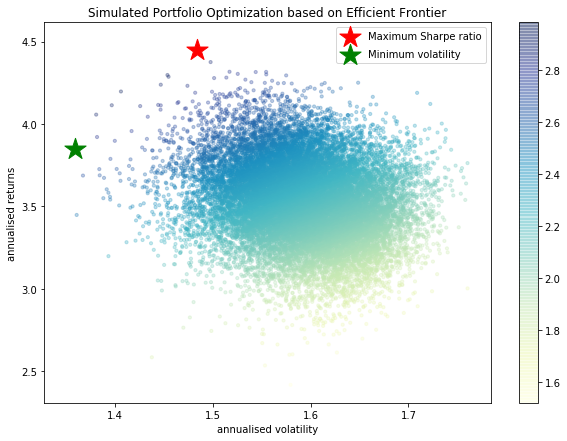

In [59]:
%%time
num_portfolios = 21000
risk_free_rate = 0.0178

simulate_ef_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

## Ignore ##

In [35]:
results = np.zeros((3,num_portfolios))
# Array to store the weights of each equity
weights_record = []
for i in range(num_portfolios):

    weights = np.random.random(len(mean_returns))
    weights /= np.sum(weights)
    weights_record.append(weights)
    returns = np.sum(mean_returns*weights) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)   
   
    # Store output
    results[0,i] = std
    results[1,i] = returns
    results[2,i] = (returns - risk_free_rate) / std
    


In [36]:
print(type(cov_matrix))
print(type(np.dot(cov_matrix, weights)))
print(type(np.dot(weights.T, np.dot(cov_matrix, weights))))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>


In [52]:
results = np.zeros((3,num_portfolios))
# Array to store the weights of each equity
weights_record = []
for i in range(num_portfolios):

    weights = np.random.random(len(mean_returns))
    weights /= np.sum(weights)
    weights_record.append(weights)
    returns = np.sum(mean_returns*weights) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)   
    print(std)
    print(np.sqrt(sum(np.dot(cov_matrix, weights)))* np.sqrt(252))

    # Store output
    results[0,i] = std
    results[1,i] = returns
    results[2,i] = (returns - risk_free_rate) / std
    


0.5379897661538294
1.6233632485659657
0.4870736155421053
1.5562712114980708
0.46649676937150575
1.4899881010333467
0.5041879992025746
1.5368028469511485
0.49024359683789365
1.5376723230439981
0.4757321687619112
1.5254365629443873
0.47324969057029276
1.505292612059105
0.4578979878057281
1.453261354089984
0.5600535566742504
1.6554989047320368
0.5182041149977642
1.588446742878729
0.5366855138659735
1.6275299222948012
0.4658559381553339
1.5086982571366454
0.47351708337296894
1.5077804910688797
0.5093449189322258
1.5632599299681997
0.46814586707743844
1.5021182295357192
0.5206112998999703
1.5865092429050982
0.5027888196260821
1.5710477535123855
0.45457435442977684
1.4615895833554953
0.4885289983385407
1.527751339115962
0.48114869900276985
1.531936834229995
0.5495619612589447
1.6518363598235328
0.5856130605824522
1.6888628264032384
0.5170491342612914
1.5831587196690688
0.5567965722755416
1.6490485609156105
0.5163949490659735
1.6041863693702216
0.5135696388044014
1.6021504805952398
0.57923030

0.5132159181268885
1.5908242764682416
0.5097773583753763
1.5813884490366832
0.5105342187676847
1.5871313479758185
0.5117028437931079
1.5931302097432838
0.5119050213918726
1.5626235331796017
0.5677587018617994
1.6457191645105582
0.489209924944516
1.5450912290530276
0.550662011418133
1.6219323606086675
0.4952697196162493
1.5645721936591312
0.5235736046044392
1.5981676307883461
0.5257952932965632
1.6187098627867371
0.5757857388716653
1.6809129620903018
0.5134969830017175
1.584012875744418
0.5481214726982993
1.6389882638192053
0.5349008703824587
1.605537917952813
0.49232622537875037
1.5473506794670437
0.5204388215679786
1.600585888015508
0.556075803439355
1.6624773967463273
0.5146083424229483
1.594430974678883
0.5289568353445044
1.6082763351601002
0.5162985271030899
1.5835285879899004
0.4969177268435234
1.509372965893533
0.543796517802473
1.6280026659664384
0.4748920451801085
1.5090173797491073
0.536091823521278
1.6260372260712068
0.5019874258906906
1.569560397317519
0.5500141703816576
1.6

0.49912530645134867
1.5495121009897985
0.4976623249401809
1.5728710324846298
0.5391508733103023
1.607565872755134
0.526207846816923
1.6045364313581651
0.5110074382737257
1.5607281707371592
0.5456957232185066
1.6188719951030333
0.4788992725368488
1.5047552666992994
0.5158829596159473
1.5972180761498977
0.5182567696447931
1.600009736564284
0.508316191187705
1.564893686484846
0.5743012389508481
1.6711800931787717
0.5385065476248767
1.6084482546873058
0.5329254677162689
1.616849302592161
0.5061145751205095
1.5664489894477625
0.4832075711679869
1.5304295223382867
0.543650386035696
1.6311169322674601
0.5098827374557255
1.5994537133740119
0.5390136093303793
1.627610872358487
0.49905141226580135
1.572461648636577
0.4806195237088125
1.519798415366913
0.4867208760387719
1.5395004108219492
0.5121461602687595
1.5936459406051324
0.5381792029040231
1.6330487064754782
0.5435288216809571
1.6300436656690234
0.4986785947662871
1.5750394003544967
0.5915175304665228
1.6896315401907143
0.5159778620628674
1

0.5289376898347005
1.6215538378306777
0.4719620653615566
1.4943950990427564
0.526166302898371
1.6072165298200929
0.542995505921121
1.6398670478170156
0.4687606744674171
1.5149361549184908
0.49045452791424354
1.529730974450965
0.5470642169005335
1.641503119543107
0.5267393874549064
1.582879133654728
0.5099532833892275
1.594194731102682
0.4794788314325498
1.5166931428978478
0.49805057676765685
1.5536444249757153
0.5122805495646604
1.5849883362144597
0.5479778124128475
1.6500178083322683
0.5240863560395005
1.5954484956361294
0.5742200304764724
1.6723231093940711
0.4823161837374801
1.5250573468602195
0.47699981721746715
1.509641752113004
0.5154823317114187
1.5926442851026392
0.5677688863495964
1.6443574009185835
0.5670512411650026
1.6701836375022274
0.528289080509658
1.6251208543651523
0.5287350907363263
1.588500464917018
0.5427434351613603
1.6294249098856661
0.5344236418180246
1.611451568927894
0.5640015722181659
1.6607771315941988
0.5889554280613193
1.6892597097218263
0.5197456723074885


0.5324895725808151
1.6128122735355697
0.5640865219943628
1.6639508707995225
0.4658403107383058
1.4949124029704361
0.47753582903965125
1.5279937520064297
0.4690900023952821
1.5219585455668725
0.582861662375634
1.6696692989563893
0.5703529782165667
1.6635415307194086
0.5210504495744188
1.6068369362057455
0.49351986987662094
1.563146223873126
0.530415924294183
1.614156832303229
0.48252692104205547
1.5235247286816016
0.5211517036156514
1.5933012747936293
0.4601750982292599
1.5026163211197132
0.46351207566420016
1.5056607611435697
0.5195976619981795
1.6059373042944651
0.500241401862324
1.576190696196192
0.5513666671940829
1.6328187807834142
0.5137289009287885
1.5684580721155328
0.5230836660805294
1.5974859922045332
0.511380907827267
1.5575457042924763
0.5220902119221049
1.616028598792453
0.5110489141422895
1.5930649177468124
0.49363897545649843
1.536411619627573
0.5643563123832451
1.6545753150686846
0.5057457976806896
1.5688298104984955
0.5210480592318422
1.615323115205455
0.587188101824111

0.5326416568074988
1.6007089141915924
0.5179956409764747
1.5796981983532992
0.4870161414675149
1.5298173778425912
0.5644985497920468
1.6665111681552633
0.48225624060637745
1.5001090113908413
0.5175634648351688
1.6011632309586656
0.5088058768603875
1.5881501899310708
0.5751653140648003
1.6653649283090477
0.5217343513181262
1.6087754892179686
0.5419870202824487
1.6120890778165973
0.5631399058793378
1.6579994838182914
0.6202923610232233
1.7235650775283362
0.45151507419224657
1.4727202674470794
0.5427689277458285
1.6375884918505286
0.4724162174509719
1.5023503644794303
0.5453299607795863
1.6310864901848114
0.5103145047007974
1.5734528135642587
0.5134690377528464
1.5846884568336201
0.5307803117793041
1.6147897901928354
0.515147298510898
1.5808276807093207
0.5042999418348456
1.567877142687231
0.49420282425976847
1.5382521732736762
0.5655128800418433
1.6375641391749822
0.5151802788910799
1.584151878430501
0.4641675245372788
1.461179223501159
0.5161015410922182
1.601628946191894
0.507106567710

0.5543845386056802
1.6514331298304883
0.5403579276789077
1.618661565482717
0.5289195242013411
1.590579550218153
0.49198946924854364
1.5449872929891535
0.5020659286200736
1.5709628296826001
0.5014541404948165
1.5688344794518767
0.5520743008800235
1.6504737533694662
0.5451825885688956
1.6306486421404898
0.6158036629703539
1.7230221402505133
0.4798768376500415
1.5129460354401907
0.5525691825083263
1.614268930335016
0.6238891954912521
1.715883285495653
0.5362747090905313
1.599614021193598
0.5087273007548225
1.5787407939428506
0.4790305622915859
1.5277773708869107
0.5162702374685564
1.5685352488610367
0.5071309517429682
1.5817439128480457
0.5104255069396466
1.5851368137723416
0.517543744764623
1.6079197180869236
0.5236116474595778
1.6026559002941225
0.5236976122438696
1.5961666088274507
0.5193806855468274
1.5838496918014617
0.5399050940396508
1.637878812140209
0.5687271218567257
1.662518374549468
0.552571644607605
1.6356124148358782
0.5551217888399705
1.6484698790986876
0.5049638902022578
1

0.5403403430111912
1.6247631934170272
0.533684177164583
1.6327560169893156
0.5137747496733286
1.571883472717086
0.48008080128433905
1.5451023405018751
0.507541740704842
1.5890663077101286
0.48383763614297254
1.5472837257909422
0.5861442388939921
1.6874948586955167
0.4916645211945793
1.5211169036512213
0.5534111708155511
1.6423353320974774
0.5511311146875879
1.6373067562680743
0.5705571480466137
1.6724465549276202
0.4765786422809128
1.502177980240256
0.5314053781643293
1.622763508980683
0.5337219138772518
1.622237694137152
0.5333196636148646
1.596072294420244
0.4958447300109612
1.5550566295015031
0.5423844007563585
1.6017804577256545
0.5775317624105107
1.668844309942774
0.5352047470917214
1.6013815810902539
0.5693961921317563
1.6577907342747624
0.5099825461777917
1.5541366245324155
0.516127373392255
1.5719854316322028
0.5411944779128456
1.6370777440368012
0.490210198924616
1.542667543082287
0.5687247170971711
1.6304528277933135
0.5386969582248957
1.6119775044219826
0.5589030075519148
1.

0.5252419972807898
1.6019762476870565
0.5198985478068571
1.5865862825001245
0.521823610864641
1.5913276466878263
0.5030309616961182
1.5759208808360476
0.5088641064404161
1.5851641083326342
0.5456312405832193
1.6316102565304769
0.5120216150742305
1.5783552964302299
0.571178971207269
1.678619170852589
0.4915001680259155
1.5539264048291859
0.5788725675510863
1.6633909861447314
0.5256231916143925
1.6167784931853375
0.5022227672775232
1.5825387463443505
0.5241131888960375
1.558225324312175
0.5861647261217707
1.6779754212267433
0.500297864681222
1.5676862973135892
0.4862378306303015
1.5209096656564827
0.5490096642723163
1.6320224869146918
0.5511973571202993
1.6498588805294987
0.572796844564426
1.6801373169738316
0.5417053122031483
1.6309455275456999
0.5133272862972379
1.593437048251492
0.5928443196750713
1.692851381367108
0.49004879117192596
1.532251667448447
0.5629160752072006
1.6391981033101757
0.5478077303133528
1.6339345462816994
0.571133033565161
1.6439008935298653
0.5465625024866955
1.

0.5389999435130761
1.634001937019687
0.5590197734000687
1.6496640711004098
0.502502605957664
1.559012267499772
0.561279963797436
1.6633978835441048
0.5644052821009182
1.663658323546589
0.517796237997783
1.5579612197277581
0.5241325083957799
1.6021910983292713
0.5545948627280071
1.6359331744090768
0.4968351590178862
1.5671417076424277
0.534470797162621
1.6274617637916238
0.587471560639013
1.6765311765654127
0.5605652860347127
1.6500340648770542
0.5371529680601025
1.6290443483463752
0.5558049522150773
1.6543721348736873
0.5915939791860678
1.6977698616130639
0.5409759642679387
1.612989566114539
0.5710140246576623
1.6574344047813494
0.533699298667449
1.6140779835524104
0.6139308603890465
1.7141209478863866
0.4729901528166826
1.5093615802546205
0.4955428532128716
1.5567579478017393
0.5196868652907115
1.591888056010882
0.48459575207943456
1.535810973624214
0.49995446130210014
1.519783479657391
0.5544172816187481
1.6442394871476131
0.515293746532105
1.5977388704745035
0.5270645334545908
1.595

0.48782861550183454
1.528267071251292
0.5023003897617708
1.5584130831904557
0.5430636586427422
1.6035539636329905
0.5123093214668567
1.5869920243716669
0.47811144039566783
1.522809103131431
0.4917918160044218
1.5511003697586017
0.5240838856643235
1.5997840964985834
0.5040140571126246
1.556272782242257
0.5679327001300534
1.6561149143920413
0.5166546056350777
1.5919167929903277
0.5433239070289274
1.6241943083977868
0.5315456123851904
1.6246797831382813
0.46908405523905544
1.5178453769237195
0.5169107350110447
1.597896439526446
0.49223968111624566
1.5559548881277567
0.5244930334575321
1.597469809794395
0.5229672740333263
1.603893257509796
0.49325565460406845
1.5632706789788628
0.5011383126168315
1.5770166026724473
0.5407287334362263
1.6293573197149536
0.47821726428898287
1.5139488334430797
0.5164296845264489
1.5741326801002113
0.5544460557995297
1.6571789969249213
0.5133105836983957
1.5653010968311778
0.5336827528962228
1.6297656397008549
0.5142676762115801
1.5928591751680006
0.5317087585

0.5159120443170699
1.5776380289050735
0.5361571986957396
1.6120146655063652
0.523583290634127
1.5967940852339577
0.5115449027580926
1.5855745996947206
0.5892920974064394
1.6809326514922218
0.6024274078259101
1.6855624378975254
0.4607178158178101
1.4666397827798656
0.5354246309714323
1.6125622370120303
0.47889691363961295
1.5407639979260246
0.45502873321910725
1.4595186599749297
0.5498953317232246
1.6331066690862739
0.5812881773690954
1.6685244407255067
0.5366483819636788
1.6279289610151728
0.5068844504935908
1.5768328491660226
0.5312812889465308
1.609594960492312
0.5937572907079113
1.701943586654175
0.4898928722426063
1.523584195804547
0.552409056719204
1.6515223318359544
0.5151736770278249
1.5804520623190457
0.5056645519480083
1.5784180906762268
0.5085967071343166
1.5838514814874154
0.5073942290355297
1.5938409912121536
0.5308184074533724
1.6278322731345047
0.5569052517786769
1.6499085345259168
0.5505358109278012
1.639294931591874
0.5322591757152679
1.6241639495862672
0.57049838475776

0.5266812538066723
1.603467091462002
0.5125851798944806
1.5953411128962807
0.4813533576707462
1.5149222197897008
0.48587008857418584
1.538399478530523
0.6360887720524082
1.7272137694627956
0.4853103585359506
1.5329876265164681
0.48532875922996666
1.5519795369787208
0.5207104881251556
1.570134383733761
0.49049268620016495
1.5526644456245464
0.44947148032347733
1.4552278550028233
0.491393234769501
1.5410890391926524
0.5329874698560431
1.6230819748467258
0.5741438248894254
1.6769551183895206
0.4852124435808183
1.551221131787704
0.5236275367018554
1.6106253920416322
0.47799284948024495
1.499873371038409
0.5452304136826358
1.6340848316524947
0.48199403549404785
1.529357447550201
0.5121906889608575
1.5886538766065366
0.5040976355319784
1.5520680347426017
0.5502867374779309
1.623693212727161
0.5355814369672265
1.6133641135190988
0.48017840829054154
1.5292560364408212
0.5313218387118436
1.623211035181381
0.5749781633253853
1.6654755728346213
0.47778514107173353
1.5326839812518462
0.54378501774

0.5004569509292108
1.5204204667243573
0.5212097027602447
1.5961311248963945
0.4873137574957867
1.548182100159209
0.5231785144065794
1.61952106448617
0.49416746044430254
1.5259669154601723
0.4828345718572725
1.5284982778068557
0.5265627312189131
1.6212022567012465
0.4854605049852005
1.5275490705944113
0.5123476870877991
1.5686476789582224
0.48870323887718253
1.555145360752957
0.5456230830884837
1.6414001133872635
0.4955700053540307
1.5699379559393367
0.5300356706567337
1.596369324215593
0.5924888311203208
1.6845658394072536
0.5063078994929959
1.5682367007245308
0.5226229593895992
1.5967155026761963
0.583083499173675
1.6837774172176574
0.5780666767313785
1.660090051716597
0.5025118492187514
1.5816771382364383
0.4731259376745135
1.4922859672808249
0.5174081094361636
1.6060536224199042
0.4629219117630908
1.4692113426155606
0.5313775152637699
1.61407777835938
0.5309139402843299
1.6068366420728084
0.46333652934356095
1.4856919234404224
0.5393743824120584
1.6253656729137902
0.4898193686240624

0.5784372975127611
1.6805019615354084
0.4951194893682099
1.5300011748965991
0.5439708331712012
1.6226666649992851
0.5100751792650092
1.5986993010711072
0.5563094651266046
1.6489649201900978
0.5413233335648776
1.6392546841267446
0.5066777714806676
1.587170101423542
0.4815573853495883
1.5368233382800685
0.5157614321175692
1.5868780630877928
0.4656960360619342
1.4784989937855304
0.5203507631352066
1.5847376967214652
0.5156033985536103
1.5932696735273753
0.5270077947594087
1.567361735111713
0.5339606817563909
1.6170120493950677
0.4716885947186894
1.4926489412306452
0.557297430554329
1.6408511291672194
0.47180811569189385
1.4743328675884788
0.5888160863275154
1.671864495625551
0.5408176196970483
1.6351529051538234
0.5191326345365007
1.5959654755264332
0.49182556836641317
1.5579389590599049
0.5781817643789774
1.6774888207661711
0.5052805556381692
1.5654861831329907
0.5083489276553866
1.5853885163665644
0.5545759798451414
1.655841890091011
0.5262872669110807
1.5865238156282524
0.4794430959253

1.5647981606867079
0.5234305206550695
1.5855184599664773
0.5431142962202754
1.6306914560109862
0.5612174606790861
1.6540481724869138
0.5498946470811181
1.6281959110577673
0.5051977164174085
1.5549132553982636
0.521354585587563
1.5600496893679923
0.5350178713569081
1.5900644259749044
0.5087755704322177
1.5945720645358772
0.49064397579542324
1.562266715455231
0.5433902932165884
1.6193264382582135
0.5225198019171367
1.5967401828672563
0.5273300910439986
1.6108958327389145
0.48345343037117944
1.522701209682212
0.4760969219060142
1.4986493868205955
0.5446234980319251
1.648739656640683
0.5784904657181931
1.6531887496937374
0.5157734954785415
1.595665336377125
0.5068367180238972
1.5649878345671167
0.5858965791355573
1.6830591397158872
0.5343317533590445
1.5945204568594562
0.5142522924161788
1.5911929613177243
0.490154300138304
1.5496008548558788
0.46605819480733723
1.5167789922656596
0.570632122502564
1.665991865063175
0.5118551020565644
1.568419205182388
0.5542865859107944
1.6435915950076623

0.5176250442565432
1.584406696302636
0.505740528053949
1.5760609470113065
0.5418288014067604
1.6079205434651893
0.5458665038372581
1.6435336608838829
0.4682135206938269
1.5060002030486253
0.47078987822637747
1.5174257215249856
0.5448328258669959
1.6368108778984742
0.552331393889064
1.628307848972047
0.5328504785563795
1.6083786066214258
0.4997670936049794
1.5606353498121022
0.5527682489629381
1.6505828391208033
0.5186395728695197
1.5909617443484858
0.5289034328521723
1.6243926976357441
0.5261185105861935
1.5929869743778453
0.46826157212014596
1.4941963901468098
0.49974652570272216
1.5801779388730004
0.5011616994959355
1.5690696133446644
0.5221024428725154
1.5555281635985188
0.560298155880543
1.6462110943655055
0.47406171513515266
1.4861572101779492
0.5075973741811933
1.5555241607663621
0.5680577927150882
1.6709526722386776
0.5296732070136967
1.6213941005889874
0.5161765683712504
1.5591963109759164
0.5311135625775587
1.6199931446010052
0.4564692269048841
1.4759604619630458
0.48874686981

0.4870684125204341
1.5217044087324396
0.5589913097882744
1.6429173387081406
0.5814595280507099
1.6807659300607658
0.5565396423391934
1.6598637990281053
0.5280528560789751
1.61433533615698
0.5004144527413367
1.5457721704874765
0.4554107355748064
1.41793223728988
0.5428525665424436
1.6271893834749758
0.4851001799513382
1.5377467500815218
0.5373549347965058
1.6387938058459801
0.5300902660187257
1.6018873213019156
0.5403986575241289
1.6146506478625864
0.4860927916812696
1.5577559469140934
0.49319986056119897
1.5621621858029908
0.5164336764673844
1.5825871880420275
0.5004269753641545
1.5705339476443811
0.5423065016235001
1.6334368133968202
0.5905384109640425
1.6748815005373443
0.5344084387067494
1.6188537017399893
0.5521247451804456
1.6280794116544886
0.5755585424140688
1.6769038657227733
0.518285948854764
1.5988126756820555
0.4620251200763624
1.4936231873590697
0.5474050174145275
1.6244670483855745
0.5399658052924386
1.6383552573538578
0.472505597090693
1.5175361947569295
0.493508649949846

0.4898602482690577
1.5108659632730383
0.5333510466595353
1.629636394710751
0.4898524355383898
1.5626975176582696
0.5322709262693407
1.6287099784013388
0.46148350705765606
1.4829306220480933
0.49319943433677615
1.532967856370261
0.535958343236372
1.6041622688043968
0.518095786564341
1.59946428563022
0.5264661840620212
1.6036129649663573
0.5194801721557161
1.5877472402779578
0.5542621176481515
1.6385362835150152
0.49249513611832624
1.5446906887388208
0.5404805394706554
1.6396307985193836
0.5060844784186019
1.5517463081243281
0.5843984181290256
1.6812302050690398
0.47258663949706575
1.4946431989165874
0.5512211043257484
1.634206890026453
0.47694508304866295
1.5011495657094498
0.47159348673010804
1.4948413612547737
0.509390761989344
1.584147050099086
0.5157053987205373
1.5859723076830525
0.5196939199550886
1.598696946672361
0.5490251729685385
1.610229323598847
0.5598350445615914
1.658047422101348
0.5121833778738876
1.5807120980730955
0.4983919092064193
1.5464216148161014
0.552101874251483


0.48602807228134903
1.5120687047920558
0.46848697198233197
1.5001252651549037
0.514336874771784
1.5682224214868121
0.5879610647928752
1.6563339916020958
0.4629323540509966
1.4252677600664394
0.5472525907588834
1.6437319986080536
0.4994335868155251
1.5693826433713216
0.5189493317888253
1.6049215033769884
0.4655919998467392
1.5097292574002223
0.5266265708296535
1.6017540146624722
0.4923328264553128
1.566454107772722
0.5381520449154524
1.616557403626425
0.48576126401063274
1.5401344558549797
0.5382507328091068
1.6223753208134046
0.4852316097517361
1.5495714212389922
0.5039440293482853
1.5877763885842864
0.5321947277879693
1.6178702375556504
0.4977356800307756
1.5561475554186617
0.5012504513588985
1.5703276516185887
0.5867743120739765
1.6838315654539433
0.5388334666162846
1.6277901771200154
0.5186477412962145
1.5785180448074214
0.4713270755735517
1.4989210895422445
0.5499977467672742
1.6349773726381287
0.5383079171401054
1.6293317956175815
0.574569712887644
1.6560873101190388
0.51554326599

0.4603117713307885
1.478109192737723
0.47223043660372654
1.4829617553875165
0.5554630349921245
1.6580522436359235
0.5062046019833324
1.5903250076918054
0.5499104929262004
1.6496286610221096
0.5628605819504927
1.6374118056324194
0.5320241418361558
1.6080533621865658
0.46690115766586276
1.5044296271784776
0.4970257330843704
1.5634618230184611
0.514111198101881
1.5686460032130376
0.5750813935444932
1.678905562657762
0.5169845300620454
1.580697573201139
0.5866269298769158
1.686404091230433
0.5178713854795554
1.5991742537942426
0.5782140072519606
1.6738408244838685
0.5044982008478014
1.5625444614704216
0.5419119029452042
1.6352731049131342
0.563615256138066
1.6456318397347316
0.4894585094545393
1.5083215888698054
0.5439546869124252
1.6420054925638845
0.5461475022980977
1.618876269459483
0.5713007140686943
1.6642876963961513
0.4856636099556747
1.52577785581128
0.516587193946946
1.5995180581239237
0.5601110228440606
1.6356968357763961
0.5011429844943129
1.5514272122327084
0.5381886620519869
1

0.544285465867398
1.632569834546653
0.5430490405215914
1.6253768851482278
0.5164935058546077
1.5507770403769037
0.4980589901024125
1.553907330186116
0.5184694406256538
1.6104311994765126
0.569004138315793
1.6700704226727647
0.5243244759697935
1.6050099056202587
0.4826366098546871
1.5340701567740669
0.5099113281159141
1.5797577049704359
0.5556098546604734
1.6238981517585802
0.5765647862188222
1.6664290201664325
0.5213762979531956
1.6039450082664584
0.52347381538827
1.577990129041663
0.5118228824761237
1.575865226489972
0.5149478242022988
1.5845195855373193
0.5347288786790525
1.6109346481418771
0.5844287488937815
1.6586111672530424
0.5999486491193164
1.7116790885547035
0.48204197559167733
1.5424890416464143
0.5575038098802841
1.6332064748041049
0.507171985343816
1.587853137418565
0.5280948610129097
1.594456510294814
0.5770598837789319
1.6537572027458596
0.5226412227962384
1.5862222740477245
0.5159849418393427
1.5969401950362692
0.5124988127615824
1.5680176753797355
0.5099484560705119
1.5

1.6439267776396191
0.4808236566135276
1.5327752392901715
0.5257107274653793
1.6158118484172659
0.5433367802058385
1.6301253756869691
0.5250439864453736
1.6072360335497564
0.5325593801637242
1.6217702146791488
0.5344127305933744
1.6262492572153777
0.5126497314348388
1.566612205153686
0.5570526970179377
1.6597253142050241
0.5034907261553818
1.5864833970943613
0.5294456852144194
1.6170839746479475
0.4914602323484887
1.5458948137888513
0.560000949507856
1.6535323365371768
0.5047296098545273
1.553954656872353
0.5405367536956244
1.627517048270152
0.5655653818288201
1.672362410243698
0.49328123390012113
1.5656395150058446
0.5455875392985459
1.616755776946791
0.4904786678355413
1.5354802600367934
0.46079204584282174
1.4768099691544663
0.4711469513086328
1.526169803642833
0.5487221228257204
1.6506517593500065
0.5885057203962021
1.6846318021859508
0.5958744510414127
1.6755712337486135
0.5217651330353064
1.5413509601488782
0.5546841900704041
1.653540610816948
0.5689674281149852
1.6650015657502677

1.6331176367028808
0.49098929679484726
1.560541245390605
0.5479741519574121
1.6443172271130815
0.5307283572992628
1.5611965012484643
0.5196496895540429
1.6063250091227421
0.4876321068551222
1.538063980110297
0.5824704682765417
1.638870314405684
0.5049841933047473
1.580555106141656
0.49538778433264197
1.533115481969694
0.5322645050792721
1.6092768643179907
0.521834236408714
1.5883194044287456
0.4670808869470847
1.5018013271960413
0.5067195058432108
1.5779055787979384
0.5479706144831574
1.6483049835158547
0.5101970384043605
1.5954639059032363
0.5133431526059586
1.5909720271982188
0.543006625577849
1.6389913303555332
0.490751301527466
1.556771394086544
0.5215051181599085
1.5812436091348354
0.4688543958658529
1.5201283254905278
0.5159704515560652
1.5592764575044866
0.5028616272171097
1.5577220237294587
0.5803168448596376
1.6567551149374362
0.5553250529170811
1.6437613348243187
0.5040852416203367
1.5707716050599898
0.48943103755191064
1.5380337444023948
0.44988990364023
1.4311235241839473
0

0.4860717216600304
1.552409594714714
0.4537399704101195
1.4563720471169033
0.48952485041549965
1.5422893596694707
0.5141447903265183
1.58216246712362
0.49705370732603005
1.5369028881992743
0.4824908184045093
1.5443102872011187
0.5243806007322259
1.5782367909786017
0.5803705606760899
1.6873427487014536
0.4893550685821811
1.5492417027579437
0.5410927600344188
1.6242669791595221
0.4608101938447683
1.475816628716084
0.540700772851026
1.6420464524204805
0.5090705588389285
1.587885198419259
0.5513886822324622
1.656481672701163
0.5588639893878654
1.6383603722042464
0.498687368727396
1.5533637770916067
0.550030406453526
1.6383368798735372
0.5007159067605649
1.5528519310370583
0.5427458253621286
1.6092413229954898
0.5286548665782747
1.5930038094518135
0.4786612444964396
1.526876091755755
0.48256945787519534
1.5285134404248508
0.509867826332573
1.575179546752142
0.4977249809483713
1.5652010080446184
0.5458064194547176
1.643196140943257
0.5007816488447401
1.5122262145105678
0.5138293017940423
1.5

1.6663647721363524
0.5440348628008769
1.6364327968021948
0.5350729526722215
1.6167691731560028
0.5488469645225588
1.6369278363373831
0.49254494359000267
1.5496469224667175
0.49107574948512767
1.5613914539958753
0.5356964370696362
1.626705380192836
0.5504531018411076
1.6338906095812271
0.5053703788598153
1.5525400422761486
0.4987872735285369
1.5639717504642703
0.6130394745749049
1.710922692227645
0.5254837273126168
1.6071845883398825
0.5062986133253496
1.578667704226083
0.5897485052228789
1.6746162222724692
0.5215855569496375
1.6084462580560084
0.5193107088324319
1.5987756857060136
0.52489959402807
1.5995160860354678
0.5486302622544704
1.6307522608246314
0.6512082366267177
1.7421025519196633
0.5742261160907823
1.6820599524282966
0.5214023698054033
1.594643823988707
0.5279579276097458
1.5919299761309125
0.5302735384536528
1.6006171037382049
0.4821539438762012
1.5355841382331719
0.5355827833896433
1.6241050340259386
0.4832510197159883
1.544866321627301
0.525619704477141
1.614224660607387


0.5484628901687618
1.620589883634466
0.49228756546658303
1.5478639883924263
0.5258288021986496
1.618755966051815
0.5249270907087794
1.589921467085675
0.5260208333611563
1.6115658389132204
0.4940941099558048
1.5299402453171187
0.4821908411557539
1.5000742298273178
0.5334798777916409
1.615056145818729
0.5267662093979119
1.6034518005335083
0.5016852969769285
1.5844662086814378
0.49973412904510617
1.5689997139993392
0.5744335712794801
1.6737097396217113
0.47924792388564286
1.5268582741317216
0.5234608384466534
1.600542106882093
0.500629136545335
1.5775411011386788
0.5776820716156252
1.6820730933405885
0.46923684205820543
1.5156231640597806
0.5354499955243314
1.6097932673713742
0.513913187254612
1.6003735172395257
0.527774424978871
1.6024315724372593
0.5560902544387758
1.6473812644995118
0.5189552162225741
1.6034340083619971
0.5536133473483957
1.6379921354182474
0.5244021781466149
1.6110554376057944
0.4718642955121065
1.5159779528794053
0.47624366126019607
1.5298382591130233
0.4985974932764

0.522381257481968
1.6116065835746003
0.5232266390186308
1.5820529528207365
0.48975937686305204
1.5527119098925048
0.5566079632791439
1.6576746003059089
0.5131917234846718
1.586289843553505
0.5186638933755054
1.604852106335587
0.5062780312811083
1.5765225955409206
0.5627761718845149
1.6539069546975596
0.5545878575161681
1.6382879265867085
0.537672772041375
1.6189024337696227
0.5332483913634214
1.62752548371149
0.5362208059238863
1.6134273605236906
0.5402551261368533
1.637813563336335
0.5379004807083827
1.6233149929897501
0.5628934414938885
1.662762300141689
0.49735449633061607
1.5654139145718031
0.5695614344540306
1.6423078975147916
0.47872518445690815
1.5306045138265951
0.5448930436821054
1.638753842314039
0.4844703174574704
1.5562831309448741
0.5047589724542716
1.5591181477930975
0.48380724490183696
1.5085438957842912
0.46956919444190387
1.4951878630216824
0.5205439717164856
1.5724191909151162
0.6262611252105867
1.730249823358931
0.5081406844796359
1.5665997805632625
0.556345440655079

0.5314824302609398
1.6155471728548259
0.5690377614828562
1.6687616439481174
0.5190237222512194
1.6090200610647516
0.5422173161297593
1.6331098730351297
0.48524907548496377
1.5445307520261242
0.5462530593708145
1.6169875920864447
0.5129521068337881
1.5915581578192575
0.5077979372701095
1.5865927058023053
0.5094642281884305
1.5922239659135522
0.5147548231374637
1.5791450565768541
0.5171137189849534
1.5715277902231013
0.4847475600917247
1.541831957570681
0.557160522446551
1.635208119737161
0.517548111168803
1.6008060382832667
0.5427001865133659
1.6350527484906563
0.49688882833448167
1.5659362261059426
0.4958342745230676
1.5671969405024784
0.5256334212822199
1.612936359526303
0.540162250616793
1.5904153112887598
0.5601138721253658
1.633482854905412
0.4661616922382292
1.5013524435507433
0.5147591395572153
1.5440953315287687
0.4927817268110031
1.5525789801738599
0.49509110200779105
1.5522999474322203
0.46735784326531066
1.5047099899563172
0.5361070727264791
1.6100755454152285
0.5533790840495

0.5170059379819576
1.604111304911552
0.5251210338219618
1.5946295427460488
0.551277416663201
1.6473341914061257
0.46309261021471787
1.476761071885199
0.46987018194287145
1.5127849692633029
0.6270674264927512
1.72278509408045
0.5960880638560472
1.6825966059787207
0.5481915753892384
1.6363165729459705
0.5102828274613724
1.5789043512863532
0.5795994353835813
1.684451918379508
0.5613093348977216
1.6562750769915562
0.5120179681631561
1.5772110535613661
0.49512424837396907
1.5678652571085705
0.5422289206514319
1.5983746331273136
0.5325010080989308
1.633855363423222
0.5356347234613982
1.6130954839756566
0.5537281214009807
1.6276398181207516
0.5659140682237636
1.6682602158820885
0.537593191856263
1.6243801992878395
0.5141978249330512
1.5838329719927167
0.5425977009672421
1.6289912035275729
0.48463651768185056
1.544064116745351
0.5122651138096537
1.5818895876021264
0.4971941449206802
1.535280043831566
0.501730447608701
1.5618072959095612
0.5599114718551634
1.6247366166601742
0.6188575802802228


0.5927355080307838
1.6886273232064417
0.49203387047229563
1.558871013230714
0.48651050218918196
1.5387413875052964
0.5107006319930855
1.5867465555362896
0.47813890146332827
1.5169540113018374
0.5291753847384427
1.6137943763203968
0.475413393410035
1.5312119388949026
0.4588137271151569
1.4852832016889954
0.4858645216177754
1.5434162599729941
0.547910385008977
1.6514958724716269
0.5435259536665655
1.644038329746474
0.47802522580105355
1.474131597770851
0.4997386759613157
1.5653196174570385
0.5174466128763793
1.593343423493302
0.4934796631367616
1.5632280438683712
0.5010048149093035
1.5782460817736592
0.5349522083835478
1.6045316919175012
0.5566808552013589
1.636133068632901
0.5221943142044587
1.5931501149320246
0.4632159634840063
1.464639613169764
0.4730648482141013
1.4866081237068909
0.5199929659040999
1.587435177011745
0.5556440854129618
1.6428677876362594
0.5663528228126332
1.644929539520995
0.5253790053045901
1.613251491581775
0.5665411409402716
1.6716266673567663
0.498366695765052
1

0.5266636894742878
1.6079254856968164
0.5188482660278818
1.5752249270412197
0.5145256113682787
1.5903956147576799
0.5383005707973493
1.6396306542471502
0.5425643868586072
1.6011543269507782
0.5004738433531912
1.5386052634997303
0.5613621591955922
1.6680150444490502
0.4665065544108232
1.4559862872860014
0.6022779576617455
1.7094946420866304
0.5523513127201508
1.6478105999297898
0.5185010966921754
1.5888251632547234
0.5638665694124493
1.6229478828114599
0.469676763588518
1.5248327607518797
0.47292884430783466
1.5258619150277455
0.4773916225865729
1.5222905702591767
0.5600479187759563
1.6399172594587093
0.5549594966937439
1.6545147438580052
0.4845390566520687
1.5110278020302503
0.5169046233887943
1.5687523509580883
0.4959018932214743
1.5517878361829152
0.5329143182649426
1.6129186650891831
0.5489136933688045
1.6364296524529576
0.4900527298827361
1.5283502544331036
0.5065320192278745
1.5699910234545789
0.502053805495733
1.5715137188569566
0.47223888358459026
1.5172822414742528
0.4794236267

0.5164520002199346
1.574360679511691
0.5949396735448121
1.6743729038258386
0.5457364051251684
1.608108908553185
0.4860714389351109
1.5410534475175088
0.47288686224443105
1.5122128107609956
0.48392723421601314
1.5441126235757823
0.47904491844677044
1.4994483961125908
0.5196023154193645
1.5893462545136088
0.5398971120584984
1.6278554761646533
0.49156024705997
1.5574894100060868
0.4955583150655118
1.533225397606429
0.49494959373419545
1.560488319034053
0.46446278661217166
1.4816552960756333
0.5160586088324538
1.591389734923841
0.509646687731804
1.5697891709236922
0.5466721839403555
1.651417477392644
0.5444380057323982
1.634938059888962
0.5153413407503614
1.6011147964425159
0.5150322317799324
1.597041033952638
0.478317659590591
1.5246282689368131
0.5063432101999142
1.581992603178554
0.5625975430831616
1.6502801049028655
0.5402620182386261
1.6350226013599236
0.5591482446802426
1.6393349417451193
0.4738949709913585
1.5293625158911943
0.4695300969136551
1.5081230883196726
0.5041033490927723
1

0.5332686052180181
1.622979960098418
0.48460151525978984
1.5222046702155223
0.47693488342387563
1.5279962207856284
0.529922630508043
1.6129971259961624
0.5165274787579305
1.5960177533404638
0.5286396224339897
1.60802461951231
0.49442049210618905
1.5648236271811533
0.5628341498182056
1.6644927064963333
0.4855085366960618
1.5344310535562167
0.5131148711754318
1.5793840644054615
0.5106372510950983
1.5824477936715133
0.5977699173770692
1.6891718591442766
0.4707856658957079
1.5149692141736075
0.5153294129272522
1.6060925605049294
0.47954167408416476
1.500002469241147
0.49484190835407293
1.5531807561973279
0.5175858533021932
1.5764807929794848
0.541836454955088
1.615437067993177
0.49384398181515893
1.5192164593443567
0.5987149931487725
1.682085537049987
0.5468977354241858
1.6429125685059616
0.5603891374097166
1.6554249769673839
0.5290081209587485
1.6201826313764527
0.565967794989386
1.6634984422108587
0.46667602474518693
1.483534166945591
0.5551138473731433
1.6279124318858194
0.5710352752174

0.545998045327385
1.627643863393747
0.5439371710513757
1.6337871472274523
0.5177877384069773
1.5903358347937189
0.5890126257385321
1.688590628740259
0.5233917090862651
1.6069790141845501
0.47345243311596785
1.5212156793277578
0.521908285404801
1.6074566288872134
0.478667682332408
1.5360148286650257
0.528448527697873
1.60460865808738
0.5406117615326684
1.6192898682552215
0.5349888887221603
1.6313469813436803
0.5144235603205264
1.5887875487027372
0.509924223469181
1.5803454994124275
0.5442283620348409
1.6056161254675432
0.5371651362079347
1.6275043023268667
0.5679066859130031
1.6680814194095364
0.549518561394596
1.6367881694784425
0.5204071666579309
1.5793457083682754
0.5130096445417385
1.5560932046597413
0.5042239304028564
1.5870604254257448
0.5257596232004742
1.5972000718839585
0.492046369996373
1.5515655656920664
0.5208191477818768
1.535848793117545
0.5655205053582875
1.6506053912027123
0.5122565209192558
1.595955299612173
0.4750285041301007
1.4884702605558924
0.5213029725719451
1.566

0.5527444321354767
1.646020688931521
0.535492131826327
1.6198557856649578
0.5038884333178579
1.587992763128233
0.5133815409961805
1.5756375416689823
0.5607617925317289
1.6670329221356732
0.5467704347392608
1.6362053679284263
0.49172622131664456
1.5551167296426378
0.519904686372267
1.6050318264243162
0.4956047441865518
1.5483507351090626
0.5798030516070874
1.6799960064450203
0.5044551254027393
1.5442559353314818
0.5119691089660988
1.5388028782287821
0.5299903761682632
1.618013052395031
0.5546367357800046
1.6464035792201046
0.5240813304937976
1.5662784945031158
0.5485439248508952
1.6241361526558353
0.5229471101745932
1.58356403305529
0.5100771213488973
1.5819381259479464
0.5656120642523594
1.6462448142723918
0.5521332734760209
1.6355570294078863
0.5486722331514355
1.6241494754830128
0.472022432233935
1.4980436284598682
0.5666529681566099
1.6551127085092605
0.5369091992061302
1.6198861168873884
0.5358722597807734
1.6371621602564248
0.5130520250280749
1.5853772003989508
0.5082037043039633


0.4748373515349919
1.5127139958912343
0.4771417773442773
1.526261729727972
0.49491494234471806
1.5677259344136396
0.5670243260993723
1.6070379020134913
0.5159211596407266
1.580880852808603
0.48494050942870454
1.5280541355635817
0.49569226089494345
1.5629199054679201
0.5202120215200933
1.5865537503545801
0.4978312036212996
1.5516429871394792
0.5391218550092044
1.6316988174442562
0.5636241646236013
1.6348239857300753
0.563473961498442
1.661281672227865
0.494616798974209
1.5513731199258787
0.478983063546021
1.52814797187239
0.47183062516838836
1.4342468799770334
0.4874672741396146
1.5268813273544146
0.5179775506862622
1.5966350645376495
0.5134037735987391
1.5821842906011525
0.5093465179949909
1.5808290285111486
0.5096355910586146
1.55647401612383
0.5670436981334442
1.6720675439189556
0.4991193170184566
1.5777103445267324
0.5136226020965077
1.5909589436497393
0.5042209347378532
1.5679292387639627
0.5610051339008695
1.6537246030809576
0.5025221255550637
1.589337217410644
0.5756055590993968


0.5140199885031883
1.5920744553940724
0.46563509865047853
1.4961865228387987
0.5087110417323462
1.5558973581903865
0.5155604591358319
1.584533636664454
0.5035931167061256
1.5613286282295773
0.5910033197895007
1.6814461984938782
0.5564822493179106
1.6571130712855922
0.5177257192029102
1.5932609770898472
0.5666764534274151
1.6574825463498224
0.54815831339375
1.644700650124624
0.4974084849005831
1.576038826676641
0.5335165071614646
1.6245529004955304
0.4856524534241898
1.5272260114279943
0.5094408303063505
1.5721881162726736
0.534880148782284
1.616655084220084
0.5099407386879977
1.567399850077496
0.48525711897942986
1.5440158038600762
0.5340260645114846
1.616761126965217
0.47647651376704747
1.5263414466786633
0.5060636611870852
1.5760718765217252
0.5446016385258949
1.640242892570264
0.4965305880794669
1.553260107540038
0.588010430781136
1.6815957024583799
0.5011839195280006
1.5736532236954306
0.5420443618406381
1.5836257193033172
0.478792303889687
1.503027602709245
0.5551667637153958
1.62

1.548914070633474
0.580917886372824
1.6766330054764518
0.47189587663611104
1.4907754641063395
0.5466292190091095
1.6424234123009014
0.4846743551805047
1.5389109321314256
0.47512055722554875
1.512498908906494
0.5499572486003225
1.628709944785188
0.5434062327925236
1.6340178983332032
0.5972881646391681
1.7100646483811972
0.5169472793475858
1.5605500933062824
0.520957917933389
1.5961788290299301
0.5167233475619699
1.5977830498440362
0.5353705870291584
1.605537555092215
0.5339509697303287
1.633632135660718
0.48661749932116755
1.5123065351951104
0.5089975035948712
1.5800736890809461
0.46539189048335333
1.4884557763231938
0.550185254105228
1.6381071670758576
0.5634927070077728
1.6533695181307573
0.494472812600208
1.5661325561114177
0.5206297138172821
1.6154937479651357
0.49071858058369594
1.5520626006289633
0.5075060951560073
1.5883426118405015
0.5148827079086555
1.580244131724683
0.5755005983846075
1.6681553427945244
0.48339052766128393
1.5231130940160253
0.506758202639457
1.590769604336394

1.5575424952913492
0.48775729178430594
1.5229876918929675
0.5395249498930488
1.6150021539444361
0.5641202242389584
1.663816083115082
0.4803676758243345
1.5193242251469354
0.4955909793561651
1.572769510621498
0.5613272372725857
1.6555498074733894
0.5180703658332787
1.5508196414689268
0.48843633752970056
1.5448250917550235
0.4589256245991006
1.47802314085107
0.5178419290798829
1.6051033439210065
0.5421946382801746
1.6359598588747075
0.46580844303254604
1.5073917865528474
0.5591297316408137
1.6459440335544604
0.5026106624152469
1.5301796027999495
0.5432253925000531
1.6317263208064217
0.5030694125018542
1.582182612970289
0.5743048016086607
1.666629224383878
0.5151382236218215
1.5905618997394906
0.5391402261880629
1.6277757404588036
0.515203537404991
1.5846754792724353
0.5927844512812221
1.6839591192860817
0.5253673089392051
1.5658046121245737
0.5331942871847765
1.6276721506812186
0.497678599348978
1.5582440520870176
0.47515787060656506
1.5294424812583705
0.49709813868559444
1.5538603305047

0.5159182814136354
1.5533553643990659
0.5146878620284262
1.5985421181832855
0.5272662757143081
1.5936757976378297
0.507054701249022
1.5801779076675646
0.5088809743231771
1.5829437597391782
0.5361165255972845
1.6303735771735393
0.5517228304387274
1.64893159961432
0.5334533343372457
1.6013193827411774
0.47815049006304383
1.517227296934162
0.4984383231741466
1.5662093218693458
0.5441163867678591
1.6371763201904665
0.5155582213764387
1.580198618003391
0.49214480846101355
1.526174794804184
0.5170958569906776
1.5991438794313495
0.5009658607409346
1.5480927057251452
0.51316053252466
1.588243100391834
0.5522651227608485
1.6385419159114911
0.4632232736771906
1.4798805595306253
0.554750813048371
1.6180395066267312
0.5663323965514593
1.647333904477447
0.5135837945077972
1.5850772162499538
0.5576775539776432
1.6327649648607463
0.48959473005447746
1.5461417914343696
0.4993972551832849
1.5486417506812131
0.5303166624653444
1.6149883091569657
0.5283509249600106
1.5913988000685044
0.46426147582818694


0.5509764585132249
1.6458734652163258
0.5136543863115035
1.58300821870184
0.5125730435373581
1.5756857984039467
0.5013078154346959
1.5438775566039757
0.5487098814051456
1.6438667224659256
0.5312385290036443
1.6309174373502662
0.5231771601066639
1.5928246530674575
0.509281570083085
1.5919188060149656
0.4797172444615346
1.514891148272088
0.5129437117341905
1.588458091578236
0.5177711953771001
1.5896863710805589
0.4943719512671532
1.5505504190544264
0.4979749619530072
1.5693600402287662
0.522452393492692
1.5904869320454091
0.559160300639998
1.6507652840206446
0.5167446348662348
1.5787039710447572
0.45706951278696634
1.4514661566314622
0.5159059782423029
1.5991382818789122
0.5012679748845679
1.5579546311491757
0.5323771691446729
1.6135245238670968
0.4850304858663886
1.5179242907125023
0.5367658260296685
1.6022776810920314
0.5071124738999652
1.5799821486992653
0.5508568503435103
1.6495375917235686
0.5187541047394608
1.6055873511581935
0.5567994826935283
1.6495313084360796
0.5028824598372411

0.5446879927621564
1.6371780870985733
0.5299332467736134
1.620599399594664
0.46852482013923574
1.5047491767512167
0.5384728129466146
1.6150502628442458
0.513091650709535
1.574054755120829
0.5364576894229737
1.6311539614910935
0.49627844890031425
1.5749928448479376
0.5629200842057728
1.6678681694117437
0.5524594629885132
1.6406448233585584
0.5509544603482952
1.6483677517347548
0.5211144218248362
1.6013479702606381
0.4687163979888374
1.5026788591220444
0.5283471719955688
1.603085020410418
0.4834505468105797
1.5427462693590959
0.49648924985126425
1.569497274074161
0.5083407995803025
1.5790284777705357
0.5915384904571265
1.6988210347304802
0.4690792922555197
1.4855224287993853
0.5417838354007218
1.6369927364447205
0.5185247507056837
1.5923421190223614
0.4922793978882061
1.551858053602317
0.5250246526190174
1.6026232021721818
0.5176802256200704
1.5984540816067119
0.5256616273744585
1.5996672552840812
0.5048125467610562
1.5699448479708793
0.5291208668162674
1.6088357425436772
0.6050332471338

0.4835559165995487
1.4654875652061552
0.5115245469512998
1.591824502034225
0.5441678662526797
1.6330946745907187
0.574779934636036
1.6566482761040915
0.48380391698260616
1.543270095121173
0.537756735578418
1.630670557798261
0.5569164017594243
1.6407088302658703
0.5386805324393953
1.6007403393017023
0.5135070682740074
1.5931285471666727
0.527065221426642
1.6122970790463826
0.5239741428376085
1.6045226119988343
0.5589757370752875
1.6330353791447019
0.46020986546186915
1.4692100742869276
0.5740309769770376
1.669522859181314
0.5178541507354245
1.5904826754946748
0.510708179179851
1.5926961237578117
0.5201114402051624
1.5691486109267128
0.5082862439592376
1.5685675353341333
0.5328320973475046
1.5922819969216766
0.5050699981514459
1.5821880255845169
0.5046250468351889
1.5769052004293722
0.5226944678128472
1.5957546087386658
0.5260759886989765
1.5838356609202668
0.5379367127233269
1.630632950923615
0.5064729611894616
1.580869327759891
0.5417822959425885
1.6387394117709917
0.5846707232742179
1

0.5580200257831095
1.6470026042131845
0.5397422723761153
1.6176693486348963
0.526996845216304
1.6170719818695896
0.5657745662358804
1.650494836487361
0.538614081818708
1.6199656795851953
0.5755189382946023
1.675375362466864
0.577902597692359
1.6791798495738965
0.5374095953444691
1.627345921053856
0.5835986524857456
1.6699474911699952
0.5239894462488042
1.6164403261213043
0.5000510108841701
1.5292826382752824
0.5347596787905418
1.6216322926945321
0.4588686573852463
1.473914299432449
0.5751838994344626
1.6506719964766419
0.48513002012196543
1.5294075289110287
0.5446167108170418
1.6395963313840252
0.49412259384016544
1.5665692076331794
0.5528206150227127
1.6474339556112763
0.573704433258447
1.668002526073419
0.49981462942419863
1.5673867498475071
0.520159130509594
1.5863559041749145
0.498735351574049
1.5704908129237731
0.551536304287396
1.643038731835605
0.5284942760571195
1.5902451141142062
0.5773919212813705
1.6780499855064046
0.507332314173866
1.5807535083110127
0.5405484167802646
1.62

0.48892926789154
1.5479590238065026
0.5335433788796798
1.5955730959530694
0.48849546524983245
1.4864510281477377
0.5504542942967245
1.6427111127862497
0.5518103687380693
1.6428309128722567
0.49918521755332673
1.5778374210907216
0.5161356936458376
1.5892029226373747
0.5657471656015064
1.667705019499861
0.5256837268499205
1.5958663550905776
0.517949293361456
1.584811306254665
0.45481798043793065
1.4744346110679236
0.49465065590312896
1.5635429884523642
0.5025166903138019
1.5579945191060673
0.5463297943294438
1.6319618436626906
0.5646009011206442
1.6071591088185784
0.5811823463790027
1.676668565996251
0.5513714504030314
1.6529716905897223
0.531901239885741
1.6217408036272503
0.6074793020311697
1.7078164531411808
0.49862333976209994
1.581163854632234
0.4833340477711446
1.5169760901481706
0.5215092499573322
1.611505111268406
0.5367948301428844
1.6024065411187138
0.5325461621370288
1.6267485900519194
0.4988001295632147
1.5580897795460504
0.48576398599322057
1.5458918635947938
0.5365662438552

1.5703194650905987
0.5330694036341224
1.6273428486234107
0.5274180020972746
1.6056252917623641
0.564330191829036
1.6583057444818197
0.5130482552208474
1.557140202454013
0.5138546230371314
1.586158721837653
0.5051104841464077
1.5788649762675044
0.5629945673732883
1.6616960314657492
0.5446719726719642
1.6317849606350605
0.5166851547497141
1.5849311980361396
0.5035672641287023
1.5877759526573998
0.4963734543547522
1.5571014853865197
0.48910376613177015
1.5635373752212118
0.516544152737183
1.5732842498912119
0.5273015072220771
1.5914364234833107
0.5568803856518894
1.6556554454476242
0.5396967419100335
1.6055206585247932
0.5131331262718163
1.5890679274784614
0.5631816020766283
1.6567414977753336
0.537790012857104
1.6134959295687352
0.4897568344179059
1.5332768950527327
0.5565025038440307
1.6325444680809118
0.6355243839151143
1.7308652687466954
0.5621342793398566
1.6587620869367325
0.5666115694632329
1.674201251653559
0.4973523011826047
1.5648944378166965
0.5074074219642514
1.566022051314663

0.5425024154672492
1.6089538692125136
0.5219842864690106
1.5934832603901228
0.5227906752747846
1.6104608006794308
0.5460756995492971
1.5818040274769096
0.528606237631582
1.6016211049532127
0.4790867951868592
1.5416280236787734
0.5095395028454758
1.581501926965299
0.5478148627778072
1.6299261168045338
0.4975722528512608
1.57470947582188
0.5358836358173845
1.5963016784986088
0.5236525782090902
1.589890655566342
0.5271193373975009
1.5963635034052144
0.5044124188659569
1.5625402845621756
0.46734518888579885
1.4912287917573592
0.5270850370275889
1.5826010822075602
0.565741364960375
1.6663586096396024
0.49771266823781074
1.5654141835833935
0.5383493066771481
1.6196176721026248
0.512932709024106
1.5753488216819387
0.5850369291644294
1.680082464942002
0.5422272696464215
1.6327546014027472
0.5112320187027658
1.5899408661093786
0.579923659339933
1.6778112483488017
0.4825583437865827
1.5440385764357965
0.46886837302258055
1.487805827616748
0.5343115773515034
1.5980683743919362
0.473953748532156
1

0.5210174442584665
1.578826368170248
0.4963480406727435
1.5497367934765884
0.508406047643447
1.5615041338269122
0.5631540921354655
1.6648529507429741
0.52728714674363
1.5951746670269311
0.5501632428223586
1.6447975912655126
0.5069359580739288
1.572385753653309
0.522540992213682
1.5884271033439723
0.47944500979626403
1.545010398548628
0.5135629778474915
1.5783017054625499
0.5101191351253102
1.5662103917583425
0.5309340511592039
1.5966475356098002
0.525655486345574
1.6075220548988043
0.5095642409461398
1.5852620351890723
0.4674625078895613
1.4473592884051174
0.5799088613639787
1.6878727391381971
0.4595399338444398
1.504548415790118
0.5436838314309241
1.6298080071995698
0.5131826122947413
1.5781999037788583
0.5522193085967666
1.6484214672887552
0.4722982494484688
1.5108939400195
0.5012392266213016
1.535593985629074
0.5343005742347697
1.5999608885236567
0.49636186131661597
1.5456476076916543
0.5251648625770824
1.5754579691785116
0.5347144925960357
1.6227481786361384
0.5471207961842584
1.64

0.5165978382894529
1.6005676182463757
0.5701795857485809
1.671018293122881
0.5474512734589528
1.6331744717605927
0.5024167867235411
1.5650909527333283
0.5367881468751866
1.6298513735282674
0.5939453504546552
1.695923336864245
0.5577978781981769
1.6599112344288762
0.5165980566773225
1.591552127879176
0.4884852259234261
1.5382788468863735
0.4896769159808928
1.5275850359479315
0.5217662820376734
1.5775444639226222
0.4751641410419999
1.5035052826400719
0.5593023616634725
1.6621030153756506
0.49323704965078985
1.547516215923691
0.5078132933735884
1.5701939085733188
0.5136519201183349
1.5824138834074113
0.49856166154381043
1.557480247050591
0.49689854784421916
1.5300698129203445
0.5548123519444391
1.6444628502608865
0.5479932879052841
1.6490757640358094
0.5494777056530988
1.6403474296122291
0.4988059962164808
1.527960113935421
0.4948636254640767
1.545806773995638
0.5419487639327458
1.6258717821644018
0.5255738747341788
1.6217900808506212
0.5683973177154582
1.6634478529877612
0.52486090388801

0.49217327031617664
1.5637333852929718
0.4528207391895796
1.371922447067859
0.5225327826134377
1.5847155430096171
0.4636447647796447
1.4765638265255132
0.5388990753601516
1.6309692483397988
0.4970711427886875
1.5601167532703086
0.6290634237487132
1.7227272575027592
0.5374186562193133
1.6254511267630258
0.4900698582454219
1.5435855812305257
0.5279781096054519
1.619582879724538
0.4969042089887418
1.5655051273324365
0.500222425579968
1.552987282699835
0.5123068063454032
1.5889693845981065
0.5711826296833045
1.6646591694936181
0.5848044747298912
1.6806047317438302
0.48653553360716867
1.5383046104036622
0.4800433160890169
1.5146444033765327
0.4722911448902656
1.5036371336746353
0.5589831817869402
1.646317987632277
0.5075718502055271
1.5763085784855495
0.4868476554308676
1.5412993639867818
0.5632004470286385
1.66679602520266
0.5347767228688984
1.607561447976004
0.5149732815378641
1.5958652688633428
0.5117200743152367
1.5838355997559186
0.5581028072122072
1.646740062434603
0.5263487137251667


0.5243080833426851
1.5835673374686123
0.5430383542432684
1.6423266599605442
0.4678612326220347
1.5212020711620375
0.5397371853139763
1.6218349499762879
0.5167775741062637
1.5848719942343317
0.5159783441342465
1.6032121342161558
0.624305334385722
1.7221354097329309
0.5029743566053149
1.5522798531283442
0.5055058627599985
1.578076517939123
0.5420186195415038
1.6441333634263802
0.5288959546065987
1.6096193820543743
0.45405287096904784
1.4818306973994175
0.4586450988276819
1.4631843740331485
0.5249206989793629
1.602639726408708
0.5304091374141198
1.5968355693377354
0.46486142752450194
1.4896898222581807
0.6485483281533101
1.731541984124782
0.5652296054438796
1.6692134841858437
0.4927983019396028
1.57264298368371
0.5580181266791864
1.65780655200482
0.4451454133560666
1.4010600057644347
0.5028653075441125
1.5665159544481033
0.5497111182210742
1.6345154932628874
0.5294039685991269
1.6147120044475443
0.561091123207328
1.6102969210414733
0.5502857434387398
1.6325219627436773
0.5395749671481045


0.4831269690215482
1.5404805356186213
0.5441593359429963
1.6300427560525088
0.5610846553849362
1.648835976159935
0.5420294431090915
1.63541301836063
0.5844064968230543
1.6821700074920776
0.5603686146859487
1.6390193524599461
0.49225213869613665
1.5685535476711516
0.5669874283563237
1.6485992180972584
0.49833722534477815
1.5649351784939625
0.5282453046009995
1.6012595516754067
0.5168428808308018
1.589749170789761
0.514838256008505
1.5826996105528988
0.5643318078816246
1.6522255441304494
0.5151300329305494
1.5976145105887773
0.5734019542675012
1.6705217797310934
0.5261114171896876
1.6019469629750296
0.5018666706046858
1.5560136352698237
0.4732584439481093
1.4785695833954895
0.5053747977533251
1.5872621010380228
0.5889259512429474
1.6967020708344573
0.5484439320316826
1.642462299702933
0.525582912991567
1.6086699243939422
0.5088373167689209
1.5791887794297135
0.5141124642358982
1.5921610966096564
0.4984124427453997
1.5605309286916307
0.5403098605950202
1.6240228164861468
0.531123423244929

0.4695583607435744
1.52209578145346
0.5104109754289723
1.572330228959226
0.5322380325347239
1.5795218649510536
0.5260818763972244
1.6106646021294668
0.5358113607814685
1.5935688433641813
0.5069401869688102
1.5840071885480154
0.5710047793439803
1.6720179013123786
0.5555998777416127
1.644136597007518
0.5035040457893727
1.589969273133281
0.5256958173236691
1.6064594613499759
0.5332330842896703
1.6119603485807208
0.5150151577531504
1.59736650987509
0.5214114456274217
1.5728692351626423
0.5368413538099969
1.6136251175883651
0.5447163762770237
1.6308179146899007
0.5248437371640575
1.6038340439091434
0.4554975321986886
1.4232587237991505
0.5055709258131854
1.5774102451900525
0.48879975108683726
1.551545719637363
0.5290370711363572
1.5862374111463267
0.5290146237903364
1.6093207750371405
0.5848194939396462
1.6768073841107356
0.5815299066849415
1.6757300334924883
0.5056846444796892
1.562533140473323
0.5597259749621283
1.6497384919339364
0.5047952024477205
1.5769405059901704
0.5279886176231026
1

1.6056558244227457
0.5466598875497036
1.6521059477171067
0.5195724603713548
1.6044161453046777
0.5464386228010595
1.633320740715793
0.48948622909756667
1.5565078245016146
0.49278451895890557
1.5230029337401458
0.4978898349746829
1.5713379951846256
0.4870658420330031
1.5349672344703664
0.5205192331828025
1.604517179017922
0.569603908867961
1.6764805601338553
0.554011666419176
1.6187485696768293
0.6061754343500134
1.7084832689056713
0.5206601593916075
1.590319535983435
0.501329664560807
1.5734829367592298
0.48777320560798654
1.510623863044793
0.5470534306996163
1.6269644031531374
0.4869221968250974
1.5223979171942295
0.49307485651576477
1.5583799148752497
0.5636843089147809
1.629294798392643
0.5317390930977944
1.6054276996034502
0.5032950242681857
1.565201563070781
0.4658142565560937
1.506785162259267
0.5779317090891128
1.652817265671386
0.5019644836230949
1.5616545381856142
0.5574936025345845
1.6377118801368076
0.5233232829063323
1.5800603005328704
0.5731248040756884
1.6775734479058868


1.6139962234656366
0.5029996419928101
1.5645517161272848
0.48454792098716787
1.4981150722614536
0.5571461723614597
1.6421189878523443
0.47707978487888775
1.5188595278544936
0.5460376417047869
1.6359892956264377
0.48189462473250116
1.537782660396642
0.5749757197400125
1.6772607008141858
0.5547293218528541
1.6326762126642544
0.5073504769750278
1.5563511113065711
0.5388602795443802
1.6052427773048832
0.5447919213948973
1.64365575054405
0.4927505528577601
1.54945917199748
0.49215523006894635
1.53452336885983
0.49503355865252807
1.5543965072825388
0.5411742563572103
1.6264975886529378
0.5623556496686353
1.6436601147386112
0.4734956515944963
1.5115585058277998
0.5446834150777382
1.619359076142
0.5672024503985283
1.666548511047851
0.5672368286791608
1.6724996463029933
0.5402056297059984
1.6194617661388424
0.49465582468107744
1.5630921535818454
0.5064054630332729
1.5510749884319062
0.4634841432962144
1.4309778436230263
0.5066005915859217
1.584647038507015
0.5220664818873143
1.6073343299287928


0.49369700201623523
1.5588902311000916
0.4771652425416341
1.515367939247965
0.46282108666460564
1.4784279378331089
0.5098152435344094
1.579655512289982
0.48139399590790766
1.528963831705618
0.506265156240463
1.5863363321375368
0.5750294093834736
1.6699998020555846
0.5119181598092885
1.5666913658847659
0.49765451409027217
1.5568250511240616
0.5083985191109952
1.5840462306438037
0.4675717061485645
1.4807594013981946
0.47930504566330645
1.5265971080310843
0.48291075301506203
1.5308080875524033
0.5099522088576761
1.5759137708439774
0.5349716934730059
1.6239879088069777
0.4927032602786527
1.5479932675037833
0.5431726067835906
1.6342054744583894
0.5217190029487951
1.5682279901761147
0.5623305966424793
1.6660961024596666
0.5335132665511881
1.6176671241597034
0.6491075431081446
1.757334209737027
0.48009507186753625
1.5074502037537179
0.5893313253729455
1.7006142889445304
0.49070620535238696
1.5480998568130153
0.5464655075262678
1.6479907826644546
0.5041369372101303
1.566060798136901
0.49197276

0.5077220522115468
1.569571806559218
0.5368304679512379
1.61525045137638
0.5214757061636159
1.6037437024076973
0.5267723194581043
1.58016464008048
0.5254243545637878
1.5536971952366452
0.5363850256757795
1.6089780666244584
0.5145580018827507
1.6014897565781387
0.516064045622636
1.5800004113632922
0.556890819714377
1.648985486411037
0.5042460725924266
1.5649531374635977
0.5344897411618251
1.5967359298428607
0.5240095130358278
1.5985258867461989
0.5810100340190599
1.670899520481706
0.4870651380347796
1.4854606766687917
0.4958212260870826
1.5603763834390036
0.5465317874355294
1.624249754061031
0.619654807772046
1.6936719207530118
0.5469857934613737
1.6294068987539998
0.49953050061117177
1.5727403314311454
0.5353063143620402
1.6208850254512652
0.5106113567046598
1.573394214685197
0.4924972345596207
1.543646805843808
0.5498106935256853
1.6467742611817406
0.5435711033483693
1.630631416251992
0.49596987482889565
1.5445860045429112
0.543774454222324
1.6029352880978938
0.5887149814340394
1.6564

1.6093627880565657
0.5045126416941529
1.5656601975196789
0.49424252054450013
1.5728371363633553
0.4919365458147632
1.5468981047360149
0.4677681215616484
1.491648324624674
0.5234139065944402
1.6127476727552736
0.5897600099221283
1.6972005392214862
0.5273854175926761
1.604059065160546
0.5526457027686283
1.6575671314703777
0.5675322384193844
1.6652468772456683
0.550948210852942
1.6536269996031565
0.5369207012103525
1.606797361172779
0.5413483729255849
1.6090716523682191
0.5045319815876275
1.5724662481233853
0.47701070479192464
1.535690791980301
0.5391318397512926
1.639023711343188
0.5085831483013171
1.5295381623511801
0.4997704377526624
1.545137795957057
0.4617510469367915
1.4848297208773962
0.5580901905214141
1.6154649559958214
0.5139750995052541
1.558503658115467
0.4805624822164435
1.5348035969481264
0.5106486544388994
1.5988908226562317
0.5431539170498995
1.6091627825456571
0.4641708067471803
1.4887221424049988
0.5281540721173871
1.6040754329055325
0.5489384845764612
1.6507133913480123

0.5253097145841625
1.6122532857331313
0.5112235935401191
1.562254849373385
0.5006324819756995
1.5757064673109942
0.5169363531775293
1.593316178583912
0.5224661416929404
1.5538748420876456
0.5293167025888619
1.6050079669127144
0.5580146300769855
1.6489646624036522
0.500337490672962
1.561864827095213
0.5933755229680818
1.6520812709682964
0.5285317381227651
1.5987999613506605
0.5195957133721466
1.6021776428478465
0.508098220018901
1.5829190143521772
0.5545230738310166
1.649658291855334
0.5133249392673167
1.5868171976660337
0.506770291233193
1.5918078688570578
0.5547758017530126
1.6303557837089668
0.4516539166511034
1.465579922214142
0.5149393444133677
1.601557209874836
0.5192291724157682
1.5671645874606528
0.5418020084008761
1.6271522426160656
0.47697054579647497
1.5116977171974646
0.46820105186521516
1.5075222532833668
0.49662779198272144
1.5637575916466717
0.46344150559987013
1.4810291761009091
0.5692865718889584
1.6636698607633402
0.5379862351681602
1.632371679434774
0.5573333764590167

0.49908852510571394
1.5531364417097726
0.5150840893117273
1.5941270020737128
0.54148641472337
1.6127250194747262
0.5024316581056675
1.5721748966957598
0.561648946022308
1.6673763763892222
0.5335396891378243
1.6182757312555434
0.5471373577081163
1.6343241276241136
0.5133013779724301
1.5681978803032954
0.5225928959224961
1.5949071672387902
0.5104026718739622
1.5848034517202647
0.48591232566954223
1.537123213350583
0.4965043067826676
1.5556174865488968
0.5277670623080708
1.6242544348831007
0.5480879462670754
1.6309122955686393
0.5547426025037148
1.6491640247356771
0.4802877234396628
1.5388810189342885
0.5441816771789367
1.6334023617419342
0.4866971277760038
1.5113767021054128
0.552802170153585
1.6484062683149168
0.5712260792505242
1.674666587619502
0.5217994340719099
1.6145413096484107
0.5318405237238172
1.6214412354679708
0.4983651331014345
1.567989394006902
0.5534692322125103
1.6343490943513401
0.5017240520740016
1.5727418550206964
0.5748505597057085
1.6629018092898442
0.537419468457605

0.5426460160972457
1.6381040072680018
0.5289338134769112
1.607684685078779
0.5586509453550981
1.6462177736919028
0.5683671215627789
1.6792326336970675
0.5287949604123169
1.5904803487060164
0.5581180865596974
1.65044954983454
0.5339626401501312
1.621591657854621
0.5394515196828079
1.6239309509370732
0.497274075307738
1.5797069862579007
0.5349979236720555
1.6149717251957807
0.5496758768532071
1.6302324991489214
0.5099181702672896
1.5859463774108513
0.5154212494264545
1.58038892686268
0.5587243812790006
1.6522723927177723
0.5428318228153381
1.613701850063182
0.511136748425407
1.595418232300168
0.5440223289014702
1.6026835555821906
0.5409901191200106
1.6284738294923249
0.5540304787843066
1.6445175251680832
0.5112463593599158
1.5854370676171246
0.49421913804372775
1.5471124497276572
0.5065546924643535
1.5864466685804548
0.4706635329586308
1.5177722330693821
0.5108289407083784
1.5876500841769619
0.5086233983209038
1.5884602797646652
0.5194600992542772
1.5976422945841326
0.5521832633302686
1.

1.6385666851341416
0.49492299256253136
1.5362850870293059
0.5255321266536201
1.6119977958904665
0.5195207658846337
1.6046331490470591
0.57087671331749
1.6348827592775323
0.4563352688227354
1.487181472768405
0.5662299082127218
1.6477278988104087
0.5584619784575645
1.6498829010745744
0.5580294151530616
1.5865727186271845
0.556899881377283
1.655556948367847
0.5297409827128772
1.5996714892117
0.4605479267058109
1.464003075718877
0.49584176200938124
1.5692560236163542
0.5160770810296134
1.5993508996772194
0.472300321172565
1.4980117947127238
0.4789125702414743
1.5085759328612447
0.5390242817557509
1.6364940401895018
0.5705863243195001
1.6311197491935272
0.49662026538470955
1.5649809843695204
0.510183371895322
1.5487359421676512
0.4927406165556954
1.5357764313442872
0.47205405576774573
1.5180691155647084
0.49563548739518914
1.556007722652767
0.5433285053578655
1.6366877029340803
0.49025022484982245
1.544467431412809
0.5097097529185032
1.5825190499112394
0.537379682033395
1.627671943072697
0.

1.5353895671967566
0.515205440011719
1.5981754246999154
0.4802818192699166
1.513673196249788
0.46857228409280693
1.4968899746785305
0.5156500252051751
1.5701646202132915
0.5008185336763662
1.5622959610813736
0.5044744845013714
1.5533306131593736
0.4827974815545258
1.5448228033359268
0.4840495802538262
1.5434647168014126
0.518940886071727
1.6079667966342215
0.48557006813202325
1.5446813214292876
0.5207200798871235
1.6096180307333703
0.5407284665826266
1.6141526931714767
0.541726999398189
1.6264348127098147
0.49378722632619126
1.536580530666046
0.5220794352925343
1.5861692396157665
0.48974863464528073
1.5515664584621707
0.5105238069033526
1.5716359949980592
0.5266181698116151
1.6074346500321048
0.5424871202656917
1.629202444906693
0.47705651468016763
1.5154989735764197
0.5088208728994293
1.5615912868517687
0.5485302102271513
1.6421670301380422
0.5405991570553976
1.6253287148577287
0.4998492419399546
1.5637389895386389
0.5262778916010127
1.612713971634878
0.48551511968893646
1.52117566704

0.5408990682917493
1.6436138577833677
0.5166557642249353
1.6048156095165942
0.544216683434189
1.644299437415132
0.4826459982551554
1.5233962039312334
0.5129052390193256
1.5694899044308914
0.463252697084399
1.46529304619004
0.5212866732265861
1.5979082673930909
0.5004880295130637
1.572270859135334
0.5700035082900261
1.671163837889038
0.4986400113143385
1.5293785869805188
0.505596948615258
1.525821744132148
0.5126925152796452
1.5694266411370767
0.49094280124461986
1.56183908372934
0.49607946931910785
1.5711775561790802
0.5152866856973769
1.5868643493349979
0.4753554621254642
1.5100334423124624
0.5999555276308827
1.7024119916889717
0.4933167287929472
1.552377713243422
0.5373046729958209
1.61759753948607
0.4724723158302697
1.5290882346774943
0.49975666391841095
1.5273209518115907
0.47314080615442344
1.5287304525706495
0.48828786383282524
1.5409347272197742
0.5716988639919864
1.6625971588845216
0.5245956461770025
1.585466788011674
0.5048016505733444
1.5728028694639693
0.5346015487203145
1.6

0.5562066612507711
1.6008590927859576
0.5790568614656825
1.6837643770829571
0.5115142778767311
1.5686251207573618
0.5034472222176377
1.5703743983181946
0.5480302789160926
1.640984031018199
0.611966049768767
1.7055883504483516
0.5183530975555621
1.5979275110207134
0.5578719361801737
1.6542783696833097
0.5750813299042548
1.676800216866575
0.5013708085885339
1.5161523254458806
0.5785980086491943
1.674925187238264
0.5318870890242038
1.6001140569587764
0.5400388764807762
1.6130978313103672
0.47373801902436635
1.5286176755060734
0.5129062464546182
1.5853145270746765
0.5441575594535035
1.6225922078548518
0.5305253379842759
1.6112113990796844
0.5014863618504964
1.5777524775405365
0.47519539240579756
1.4968721600663537
0.4790006994996193
1.5267186056774096
0.6595403016253717
1.7544233647082903
0.4896782177804707
1.51327205917393
0.4997014901723638
1.5729906199381563
0.5148036181279013
1.5915488880562598
0.4915016317803409
1.558807514406789
0.5410892199275981
1.6285385040365015
0.516649853822267

1.539430527941206
0.5222407504816997
1.597661174798852
0.5474747183211212
1.6296020569678045
0.4761028720956985
1.5077457583153584
0.4882959622798566
1.556491645133567
0.47297815346005156
1.4908483640669614
0.48520991983266354
1.52479069092493
0.50346077009246
1.567326236158062
0.4983510412479943
1.5710504087634898
0.5529181504129241
1.6391624681194539
0.5028024971788569
1.5706566683156618
0.5559286540486932
1.6520492810601133
0.5566653806833425
1.6471719427366243
0.524569851982936
1.5977291845017636
0.45443207731172225
1.431225678966961
0.5507237725472841
1.6442090230313322
0.5750813233169255
1.6664159980882733
0.48502648209403426
1.5497193801822289
0.5110272759775915
1.596485520897354
0.5344332599060062
1.6179434850291623
0.5055891158134975
1.5879360464702041
0.5392832360076888
1.6211860528503788
0.584486088735162
1.687529250446994
0.5243302926670268
1.6041754812987663
0.5362265301069391
1.626805954135949
0.48903525416794896
1.5275356729920078
0.5105730989391808
1.5845740429603075
0.

1.4997425659309855
0.5734076658989453
1.6679789030580674
0.5595340833925517
1.653016212654717
0.5129819117587673
1.5894366676704612
0.5120700485286018
1.5960311803315352
0.4773664791020752
1.5063930310540563
0.5420267110884173
1.6316482493239353
0.5629316165346042
1.646028234851689
0.568306540607079
1.6737946267064037
0.5511902558207806
1.6219063977141621
0.541987146697054
1.6359607937844978
0.5105841586906431
1.6000809129140192
0.485254563881957
1.5365706113771649
0.5271907956715763
1.5909812035733921
0.5728967369737331
1.6723018256769449
0.5029990687886774
1.5619358058134187
0.48626234597033546
1.5153105945460281
0.4889245795023892
1.5361133354694734
0.5717581021803143
1.6757792789334498
0.5412173182595698
1.5753765181061095
0.535335414294285
1.5916058797964212
0.5705120362017636
1.6788515324423015
0.5721464174909545
1.6663968871654111
0.5015569876541379
1.5538415890243351
0.4570544400356368
1.485039413618692
0.4701254003873348
1.516893005837243
0.5306992166033155
1.614956111121735
0

0.46460214325953614
1.5016272909215858
0.5183056815572672
1.604327504608053
0.47769705097285475
1.533462252145519
0.5282946163660456
1.6225205049884395
0.5529243944434604
1.6423933240118391
0.49077986437862425
1.5377892636932675
0.48142606913112446
1.5354385300287157
0.6136312341546399
1.708679327503761
0.5327004532663606
1.6173474843138844
0.49706659917432494
1.5469394112808876
0.5816740134594033
1.6773345599635292
0.4970608911454355
1.5550880907845335
0.48342071312144347
1.536772303496357
0.5310770378381358
1.6157210331020655
0.5221013936439185
1.610013387377345
0.4711740339426249
1.5297866527742336
0.5490129199981466
1.6250755767647256
0.5232592934054713
1.5813979896703014
0.4631865630071875
1.4987562348082342
0.5211813789424101
1.5862522499727296
0.5251828480928304
1.6134728267319494
0.505986531505164
1.5725853832103585
0.5522509743133732
1.6003111898618623
0.526382648551863
1.615072166196695
0.4686531565893969
1.4914785464005047
0.5479548341594448
1.6350504971492033
0.541505512551

0.5320510472853738
1.6146049467086145
0.501219174543486
1.5844605976586417
0.5778460471448569
1.660401368170149
0.5339186009597967
1.6251365885240123
0.4974158016874671
1.5690717257732845
0.5362735985690386
1.5928627077260389
0.5404238447941502
1.6362068558576266
0.5158327078843206
1.588211519861952
0.5042106313919255
1.5655376234303169
0.49664390296659083
1.5281017778284631
0.5620231345657053
1.6605428915313218
0.4960280515557564
1.5724881152162573
0.5039843396359014
1.5681840517991488
0.5042725599892133
1.5628861145496964
0.47833954782572435
1.5159865557453813
0.5529621067282927
1.6331891308755877
0.5548928324203867
1.6411663193344503
0.5508781772804161
1.6441613879948755
0.5200099477284432
1.5844494572388472
0.5353618114339956
1.62660771380694
0.5218143009380704
1.6092756763420324
0.5489709608460271
1.6353292192209166
0.5589788828135865
1.6527022354791818
0.49196694457862405
1.5613463211914353
0.536527182304306
1.6324155751428253
0.5067577719686094
1.5830281313517738
0.5168761145595

1.5776050832460036
0.54520061113729
1.640698435042961
0.5227467677970155
1.582821794864969
0.5042478205109779
1.5585707875584451
0.5615815342627007
1.6529180100796395
0.5311007086570297
1.592422075031723
0.5885124055395212
1.6844697139508682
0.46134210780935014
1.4955451946580398
0.49693104363651325
1.5342427731347534
0.5065806917862372
1.5649499929449608
0.5466504138072056
1.6302444492206782
0.5707359858158569
1.669587470746591
0.5926622566169223
1.6929223455540159
0.5452393713944619
1.6383636081719957
0.5322886998395865
1.6139672135310954
0.5445814438663216
1.621211603710923
0.5037533057125325
1.5906305596989558
0.5675095926560878
1.6729643637450653
0.5275191570291949
1.5937500295321252
0.5104003093412175
1.5821570436829653
0.5101107814763544
1.55340204457097
0.4816021488671376
1.5116637134627844
0.5461850849300124
1.6106398485598687
0.6012502883221272
1.7042590245778468
0.5296529285347544
1.617246961285502
0.5391602986656823
1.6137817625044208
0.49344791843531915
1.5206872692840878


1.7032213823879636
0.472051109068391
1.5099485603880158
0.5418523997701556
1.6304772633048965
0.48446073167633896
1.5224699583584917
0.47950832265849636
1.5301038767971893
0.5696095422775596
1.6345202389886055
0.49841117579139405
1.5380501131454474
0.5585758750372707
1.6447699119819328
0.5380104494706924
1.585272313108087
0.5238471410982083
1.60622685896652
0.5646044218820429
1.6504823800853217
0.5738273021177432
1.631433889176834
0.5168734976756135
1.583403087396605
0.4793408014344909
1.5217514187280394
0.5143924454742441
1.5913019434580555
0.5057833045322631
1.5882445758971597
0.5266219136219895
1.6056538145235792
0.5447052238837111
1.6463820263121398
0.5692585254078817
1.661359950660813
0.4690224951974638
1.4870155220774701
0.5818624194938362
1.684357108871186
0.5554522441506468
1.638498853072078
0.5073530997585413
1.5779351730699964
0.5481353745496624
1.6367421918698482
0.5279937426269397
1.6208475382963
0.5163250167191951
1.592934076433872
0.5925841383496684
1.6774441329242933
0.5

0.5129533693369634
1.5469675344555724
0.5857899083905156
1.6898209843697392
0.4827840698618537
1.5188274988882915
0.5025213768118126
1.5341845267501282
0.5113690537659732
1.5941251653611803
0.49582838853397987
1.5584093694729115
0.558512226914044
1.6594633772065712
0.606444574664203
1.709894458832544
0.5169406202136523
1.5893709107367022
0.4958032711249339
1.5189818263142232
0.5363482332539858
1.6346739792363565
0.4875979988498926
1.4853914193851683
0.5366886701125029
1.6157188203254687
0.5250286040530852
1.6155328504177664
0.5220348276054108
1.5925985165056136
0.5647338739569028
1.6646167042906013
0.5273818741149833
1.605707401254945
0.5061584883667772
1.5608952399914822
0.5195812003027171
1.6103142212748425
0.5542869964380847
1.6474415512377705
0.4626113927491735
1.5056096239972923
0.5217538952382164
1.5933748691629714
0.5458727191700925
1.6177305733121914
0.5493092948616854
1.6142507434775022
0.5714265306297255
1.6412785511928079
0.5117639637379122
1.5622315830547098
0.4955083958369

0.5242671688452696
1.613309073031567
0.5308447085669873
1.6097681502652057
0.49570149804122293
1.5523539959908197
0.5166464194436464
1.592877520709612
0.4982547944716737
1.5705796529991463
0.553062166656191
1.6467899779004282
0.48577496747838833
1.5481661532240518
0.5010373046237823
1.5799029241012017
0.4650794329241495
1.4971864495590983
0.5369054833930418
1.6036755766857986
0.5220190652600272
1.5961050998206012
0.486828030168927
1.5317984736149435
0.5876513757354741
1.6789820960178246
0.5238834866870385
1.56130199118365
0.532861211553851
1.6130234640024363
0.5699931937807641
1.6644901548236437
0.5273911150714099
1.6046924729330756
0.5137017803652676
1.5631730314929935
0.4795070791159756
1.4404658516849962
0.4989617383616429
1.5583924859090792
0.5240594833067745
1.5985609983075466
0.5518092983268292
1.6558024484906944
0.4888789983919132
1.5457548903521776
0.4624384800282014
1.4755959487696915
0.5325053055571837
1.615127694875195
0.5204988444091143
1.5889362332535235
0.5632829309767946

1.6236164346523463
0.5933615594092813
1.6411002900920615
0.5232557094193061
1.619849282387184
0.4996117167933225
1.5703042836129761
0.5411569544951981
1.6145749671183391
0.4744910313929653
1.509646372637396
0.5108844236633416
1.5951620308174395
0.5012243370628977
1.573969706704079
0.5368903275629786
1.61832418450639
0.5431074316187348
1.6476354771664838
0.5071790498760216
1.5832844855240649
0.5377149807975868
1.6183312195663644
0.6107931403591659
1.7198732323677568
0.5558564684493424
1.656857939688422
0.5060695817740192
1.5818746339907395
0.5409787486662697
1.6085450527906495
0.5260925638796977
1.5900385378644342
0.5444940871901162
1.6325027425856153
0.5439892875371046
1.6304438644119024
0.5088289674260287
1.5698103574110058
0.567581306337846
1.6667314732346155
0.47866026415406654
1.5293120702411478
0.6098936927373608
1.7168304271548867
0.507496417078148
1.5944355452717813
0.4886180599097958
1.5570106704712923
0.5017805372918438
1.5688525103164566
0.5344695299487172
1.5986242341036192


1.6456904551162195
0.5463184905071768
1.6372947112134377
0.5122401029901437
1.581461066491253
0.5324157198820941
1.6223110261937759
0.5600495135872992
1.6556630880452317
0.5518944217910378
1.6475867638774722
0.5022368731455229
1.5757180325934763
0.5224373274819673
1.5931128637308243
0.5261001084546065
1.6099055959509612
0.538490793404618
1.6270662322545895
0.5273107828954682
1.6080415464570057
0.5480491689312779
1.640219087231599
0.48670755988466236
1.5506403427098654
0.551750482809705
1.6281041707786945
0.5487479968368879
1.6494373713628092
0.4758590424264768
1.515998127248418
0.4774014389430507
1.5186362196327376
0.5084878041410908
1.574568933638806
0.5262512271160065
1.597707435243405
0.5487511588263314
1.594641689579062
0.5300879530498533
1.5931866852737366
0.47732900568508074
1.5327830646785912
0.5342484036751266
1.6292543845405991
0.4963019690133985
1.5501743423764496
0.4974001584116005
1.5589323028210482
0.49188059824512376
1.5571056740035631
0.510473644521469
1.5532019500260392

0.4813690501409182
1.4957133849820368
0.5149658087784219
1.597571720520712
0.5185547976202944
1.5917946036634905
0.5005480546464162
1.5762120640329929
0.5385101755226979
1.6188005201637403
0.516130400408281
1.606900690685728
0.5526283762315425
1.6441680280944926
0.5820633041464226
1.6608786136106108
0.5126928794928058
1.5870045368165813
0.5166131687062265
1.5860017591980142
0.5176559382995045
1.5842993176471842
0.4839466948221639
1.522316658777822
0.5161556257079535
1.5745275480852647
0.5009323767624126
1.5746147502455405
0.47684845243163704
1.490959808688495
0.5285966414078519
1.600973359722992
0.5158501177042006
1.5833262019682852
0.5420502795967465
1.6331513768579298
0.5166104302723444
1.5905645940120603
0.47298767272813047
1.5166080120511474
0.48623292413442654
1.557836475605716
0.5650736400303142
1.641466988376222
0.48822891853493566
1.5088914591073854
0.49446870237130475
1.5679732914815396
0.6163543982578804
1.6945427278193879
0.5908153676516222
1.696488880830532
0.51438108780402

0.4934961322393617
1.5570965986754428
0.5061668217378059
1.562795475358024
0.5432753646257525
1.6440231769731894
0.48362296198623006
1.5280442242695267
0.5289034452984243
1.6162270325578139
0.5321977099818478
1.626640221692386
0.5329378529104287
1.6199160207117482
0.5324817520335297
1.5987929377582755
0.5062393238273796
1.5887492771863685
0.4802087896445007
1.4857334588816757
0.5064098353370555
1.5793546972450114
0.5228417834932151
1.5353885846092705
0.5409076176194503
1.6409745086320566
0.5081653082212853
1.588102430406864
0.4905526375382376
1.5431819207894875
0.5598616699372639
1.6503170588792553
0.5245763985595365
1.6009751806686743
0.5053671413325324
1.5730414641675372
0.5005252368022721
1.5826943288223432
0.5384355149500202
1.6299504787467143
0.5100706581239007
1.5807972574238882
0.4812253703873936
1.5323022880913142
0.49029111952868315
1.5414084794206508
0.5126603851696256
1.5842313820802902
0.5485282756409114
1.6023950993701266
0.5550006746633925
1.6341831278975245
0.55094587047

1.5913249302074215
0.5017876488984273
1.5874308879680772
0.5519565284186914
1.6144651921241187
0.5560128191905589
1.6484476828645243
0.506039177449718
1.561623343119562
0.5375285551348549
1.6003533764978897
0.5994319953490761
1.6963017670204963
0.5300026992495451
1.6148678464328712
0.5274943046553819
1.615602936594431
0.4813395235201978
1.5076292187369225
0.6030064928294966
1.6798650910699073
0.5391982528260089
1.6167522230646107
0.5184077633198674
1.5631632564872437
0.48765412901602045
1.5370381432596854
0.6084602848217318
1.7018826337479855
0.48273202912473656
1.5372732915493057
0.4542934132458022
1.4626695435723107
0.496432556463713
1.55792255678512
0.5091915089547211
1.5798030067727167
0.5960708367659674
1.6996964932922312
0.5041569949885206
1.5754675148680728
0.49936553780684406
1.5670919169034647
0.5205859923671021
1.6025346011390171
0.5175200007120118
1.602453444870503
0.48885907522895244
1.5449504223694592
0.5045710769371501
1.557389590612314
0.5097395317803979
1.59223864644328

1.5685661301928389
0.5899274524918978
1.6859400004432723
0.5506751314493796
1.6531973064705152
0.48119606417139565
1.5367519947224788
0.5206064635950463
1.5950553758399164
0.4882624375778232
1.5419824769457806
0.5040494394474585
1.58219670941185
0.5411109376372046
1.6329992706182839
0.5447233972765083
1.6367193563855267
0.544504901549685
1.6389186684615487
0.5489464916017595
1.6275914689619693
0.5103849502829343
1.577962788369201
0.4954348921852077
1.5549733883385417
0.551257244130875
1.6414733677309283
0.5348870666864539
1.5980275607947227
0.4925887720001945
1.5523227190548536
0.5248834512122563
1.6120633903301393
0.5352103092178577
1.6259192790022223
0.5268145738669135
1.6105692932615732
0.5795815449996967
1.6758124269907675
0.5470260976300368
1.626110487460818
0.5539723653686354
1.6210688783311447
0.5508089108370267
1.6359937918284768
0.5211244158271648
1.5729712577786423
0.5645851767711423
1.6480716240766122
0.523874557466879
1.601171313663876
0.5278991365317646
1.5756637700541878
